# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection


In [ ]:
### Importing the Kaggle API token file
from google.colab import files
file = files.upload()

Saving kaggle.json to kaggle.json
Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [ ]:
!mkdir -p /root/.kaggle
!cp /content/kaggle.json /root/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import os
import kaggle
import pandas as pd

### Passing credentials from Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = '/content/kaggle.json'
os.environ['KAGGLE_USERNAME'] = 'nireshs'
os.environ['KAGGLE_KEY'] = 'ed63872146924de58413621428cacf1d'

In [ ]:
### Downloading the dataset from kaggle
kaggle.api.dataset_download_files('blastchar/telco-customer-churn', path='./', unzip=True)

In [ ]:
### Reading the dataset into a pandas dataframe and displaying rows

# Setting max columns that can be displayed
pd.set_option('display.max_columns', None)

telco_churn_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Visualization

In [ ]:
### Getting the number of rows and columns
telco_churn_df.shape

# The dataframe has 7043 rows and 21 columns

(7043, 21)

In [ ]:
### Calculating % of nulls

telco_churn_df.isnull().sum()*100/len(telco_churn_df)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [ ]:
### Getting the overall info to identify if columns have null values

telco_churn_df.info()

# It can be seen that none of the columns have null values
# The following columns have inconsistent datatypes - TotalCharges is of type string. It should be float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
### Creating a copy of the df to manipulate and modify

telco_churn_df_copy = telco_churn_df.copy(deep=True)
telco_churn_df_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# telco_churn_df_copy['TotalCharges'] = telco_churn_df_copy['TotalCharges'].astype(float)

# There seem to be blank records in the column - ValueError: could not convert string to float: ''

In [ ]:
# churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

In [ ]:
### It was seen that the TotalCharges column cannot be directly converted to float as it has blank values (" ")
# Replacing it with NaN and converting to float+

telco_churn_df_copy['TotalCharges'] = telco_churn_df_copy['TotalCharges'].str.strip()
telco_churn_df_copy['TotalCharges'] = telco_churn_df_copy['TotalCharges'].replace("", np.nan)
telco_churn_df_copy['TotalCharges'] = telco_churn_df_copy['TotalCharges'].astype(float)

In [ ]:
telco_churn_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# We see that there are 11 null values after converting to float64
telco_churn_df_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
### Previewing rows where TotalCharges is null
telco_churn_df_copy[telco_churn_df_copy['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


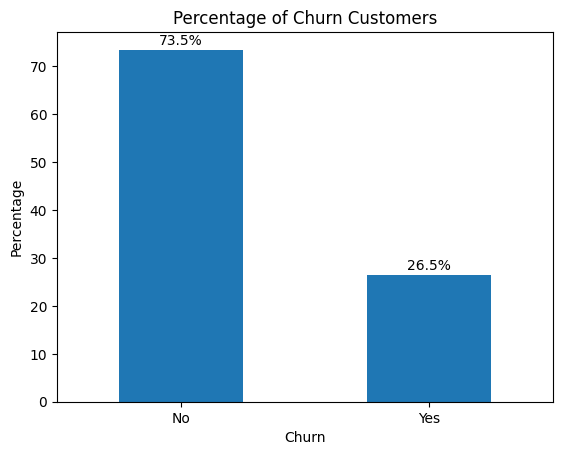

In [ ]:
### Getting distribution of churned and non-churned customers
import matplotlib.pyplot as plt

churn_counts = telco_churn_df_copy['Churn'].value_counts()
total_customers = churn_counts.sum()

churn_percentages = churn_counts / total_customers * 100
ax = churn_percentages.plot.bar(rot=0)

ax.set_xlabel("Churn")
ax.set_ylabel("Percentage")
ax.set_title("Percentage of Churn Customers")

# Add percentage values above the bars
for i, v in enumerate(churn_percentages):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.show()

# We see that 26.5% of the records (1866 records) are customers who churned. 
# Since this is the class of interest and all the rows where TotalCharges is NULL belong to Non-Churn customers, we can drop them (0.15% of total records)

In [ ]:
telco_churn_df_copy.dropna(inplace = True)

In [ ]:
telco_churn_df_copy.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
### We now have 7032 records and 21 columns after null treatment
telco_churn_df_copy.shape

(7032, 21)

In [ ]:
### Doing a describe to get a sense of aggregate statistics
telco_churn_df_copy.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


We notice the following:

1. MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies have 3 unique values - we can check what those values are

In [ ]:
for column in ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
  print(column)
  print("---------------------------------------------------------------")
  print(telco_churn_df_copy[column].unique())
  print('\n')

# We see that 'No' and 'No internet service' are redundant values and can be merged into one - 'No'

MultipleLines
---------------------------------------------------------------
['No phone service' 'No' 'Yes']


OnlineSecurity
---------------------------------------------------------------
['No' 'Yes' 'No internet service']


OnlineBackup
---------------------------------------------------------------
['Yes' 'No' 'No internet service']


DeviceProtection
---------------------------------------------------------------
['No' 'Yes' 'No internet service']


TechSupport
---------------------------------------------------------------
['No' 'Yes' 'No internet service']


StreamingTV
---------------------------------------------------------------
['No' 'Yes' 'No internet service']


StreamingMovies
---------------------------------------------------------------
['No' 'Yes' 'No internet service']




In [ ]:
# Replacing 'No internet service' and 'No phone service' with 'No'
cols_to_replace = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
telco_churn_df_copy[cols_to_replace] = telco_churn_df_copy[cols_to_replace].replace({'No internet service': 'No', 'No phone service': 'No'})

In [ ]:
telco_churn_df_copy.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,NaN,2,2,NaN,2,2,3,2,2,2,2,2,2,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,NaN,3639,4933,NaN,6352,4065,3096,5017,4607,4614,4992,4329,4301,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


In [ ]:
### We notice that some binary categorical columns have yes/no (Partner, Dependents, PhoneService, etc) and some have 1/0 (SeniorCitizen). Encoding the columns that have 'yes/no' into 1/0

# Replacing "Yes" with 1 and "No" with 0 in the binary categorical columns

cols = ["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

for col in cols:
  telco_churn_df_copy[col] = telco_churn_df_copy[col].replace({"No": 0, "Yes": 1})

In [ ]:
telco_churn_df_copy.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032,7032.000000,7032,7032.000000,7032.000000,7032.000000
unique,7032,2,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4,NaN,NaN,NaN
top,7590-VHVEG,Male,NaN,NaN,NaN,NaN,NaN,NaN,Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check,NaN,NaN,NaN
freq,1,3549,NaN,NaN,NaN,NaN,NaN,NaN,3096,NaN,NaN,NaN,NaN,NaN,NaN,3875,NaN,2365,NaN,NaN,NaN
mean,NaN,NaN,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,NaN,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,NaN,0.592719,NaN,64.798208,2283.300441,0.265785
std,NaN,NaN,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,NaN,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,NaN,0.491363,NaN,30.085974,2266.771362,0.441782
min,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,18.250000,18.800000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,35.587500,401.450000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,70.350000,1397.475000,0.000000
75%,NaN,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,89.862500,3794.737500,1.000000


In [ ]:
### Checking the level of data
telco_churn_df_copy['customerID'].nunique()

# We see that each row corresponds to one customer. Since, it is only a row identifier, it can be dropped as we will not be using it as an input to the model

7032

In [ ]:
telco_churn_df_copy.drop(["customerID"], axis = 1,  inplace = True)
telco_churn_df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
### InternetService, Contract, and PaymentMethod are categorical variables with the following unique values

for column in ['InternetService', 'Contract', 'PaymentMethod']:
  print(column)
  print("---------------------------------------------------------------")
  print(telco_churn_df_copy[column].unique())
  print('\n')

# We can do one-hot encoding to convert the above 3 categorical variables into binary columns

InternetService
---------------------------------------------------------------
['DSL' 'Fiber optic' 'No']


Contract
---------------------------------------------------------------
['Month-to-month' 'One year' 'Two year']


PaymentMethod
---------------------------------------------------------------
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']




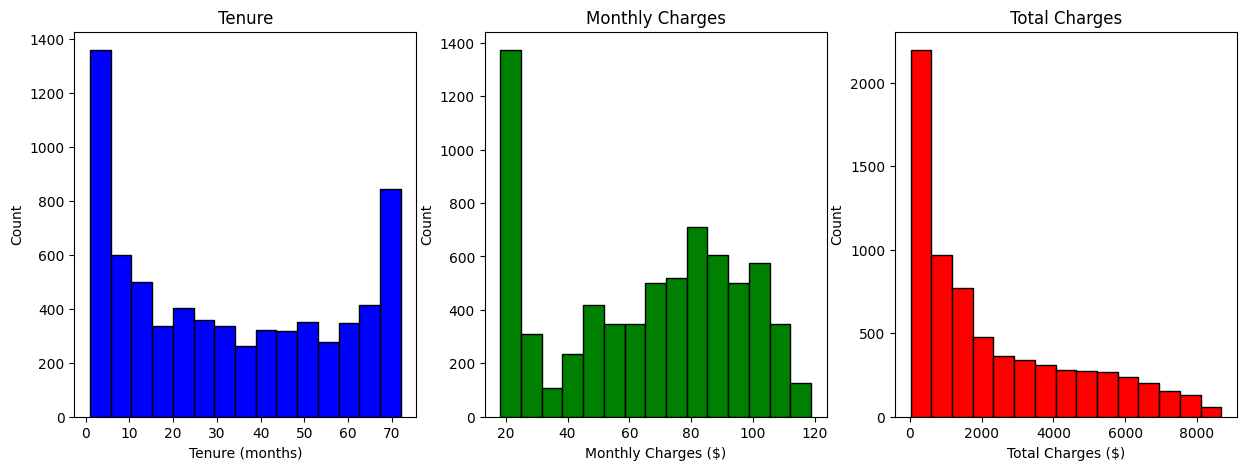

In [ ]:
### Checking distribution of numerical variables ('tenure', 'MonthlyCharges', 'TotalCharges') to identify the shape of distribution

import matplotlib.pyplot as plt

# Creating a figure with 3 subplots and setting plot size
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting histogram for 'tenure' variable
axs[0].hist(telco_churn_df_copy['tenure'], color='blue', bins=15, edgecolor='black')
axs[0].set_xlabel('Tenure (months)')
axs[0].set_ylabel('Count')
axs[0].set_title('Tenure')

# Plotting histogram for 'MonthlyCharges' variable
axs[1].hist(telco_churn_df_copy['MonthlyCharges'], color='green', bins=15, edgecolor='black')
axs[1].set_xlabel('Monthly Charges ($)')
axs[1].set_ylabel('Count')
axs[1].set_title('Monthly Charges')

# Plotting histogram for 'TotalCharges' variable
axs[2].hist(telco_churn_df_copy['TotalCharges'], color='red', bins=15, edgecolor='black')
axs[2].set_xlabel('Total Charges ($)')
axs[2].set_ylabel('Count')
axs[2].set_title('Total Charges')

plt.show()

For Tenure and monthly charges, we see a bimodal shape and for Total Charges it is skewed to the right

<ipython-input-32-53553c3ca586>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(telco_churn_df_copy['tenure'], color='blue', shade=True, ax=axs[0])
<ipython-input-32-53553c3ca586>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(telco_churn_df_copy['MonthlyCharges'], color='green', shade=True, ax=axs[1])
<ipython-input-32-53553c3ca586>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(telco_churn_df_copy['TotalCharges'], color='red', shade=True, ax=axs[2])


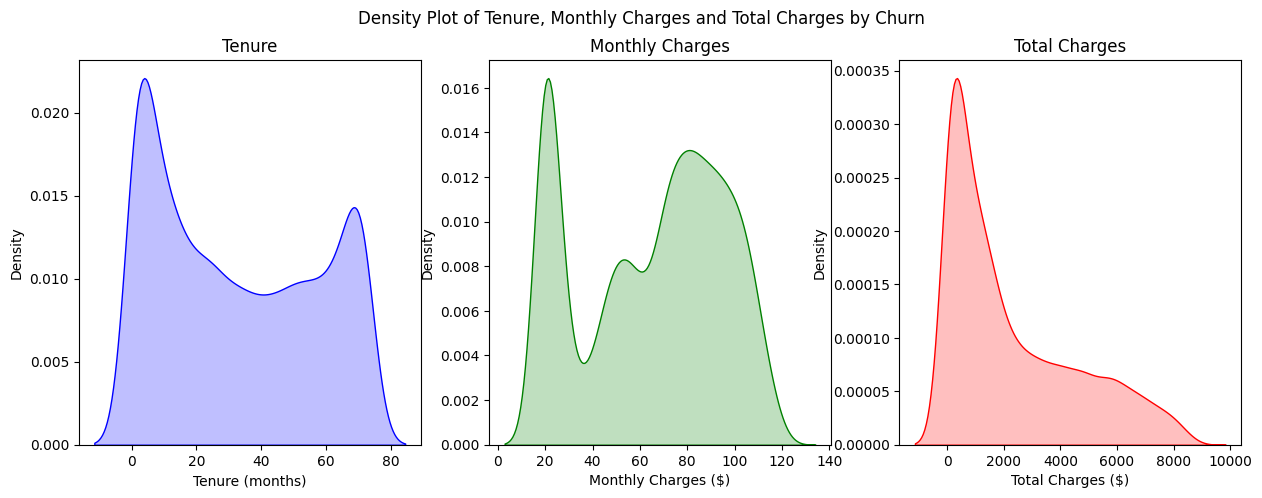

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a figure with 3 subplots and setting plot size
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting density curve for 'tenure' variable
sns.kdeplot(telco_churn_df_copy['tenure'], color='blue', shade=True, ax=axs[0])
axs[0].set_xlabel('Tenure (months)')
axs[0].set_ylabel('Density')
axs[0].set_title('Tenure')

# Plotting density curve for 'MonthlyCharges' variable
sns.kdeplot(telco_churn_df_copy['MonthlyCharges'], color='green', shade=True, ax=axs[1])
axs[1].set_xlabel('Monthly Charges ($)')
axs[1].set_ylabel('Density')
axs[1].set_title('Monthly Charges')

# Plotting density curve for 'TotalCharges' variable
sns.kdeplot(telco_churn_df_copy['TotalCharges'], color='red', shade=True, ax=axs[2])
axs[2].set_xlabel('Total Charges ($)')
axs[2].set_ylabel('Density')
axs[2].set_title('Total Charges')

fig.suptitle('Density Plot of Tenure, Monthly Charges and Total Charges by Churn')
plt.show()

<ipython-input-33-c31fd0f93cb7>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(telco_churn_df_copy.loc[telco_churn_df_copy['Churn'] == 0, 'tenure'], color='blue', shade=True, ax=axs[0], label='Churn: No', hue_order=[0,1], legend=True)
<ipython-input-33-c31fd0f93cb7>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(telco_churn_df_copy.loc[telco_churn_df_copy['Churn'] == 1, 'tenure'], color='red', shade=True, ax=axs[0], label='Churn: Yes', hue_order=[0,1], legend=True)
<ipython-input-33-c31fd0f93cb7>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(telco_churn_df_copy.loc[telco_churn_df_copy['Churn'] == 0, 'MonthlyCharg

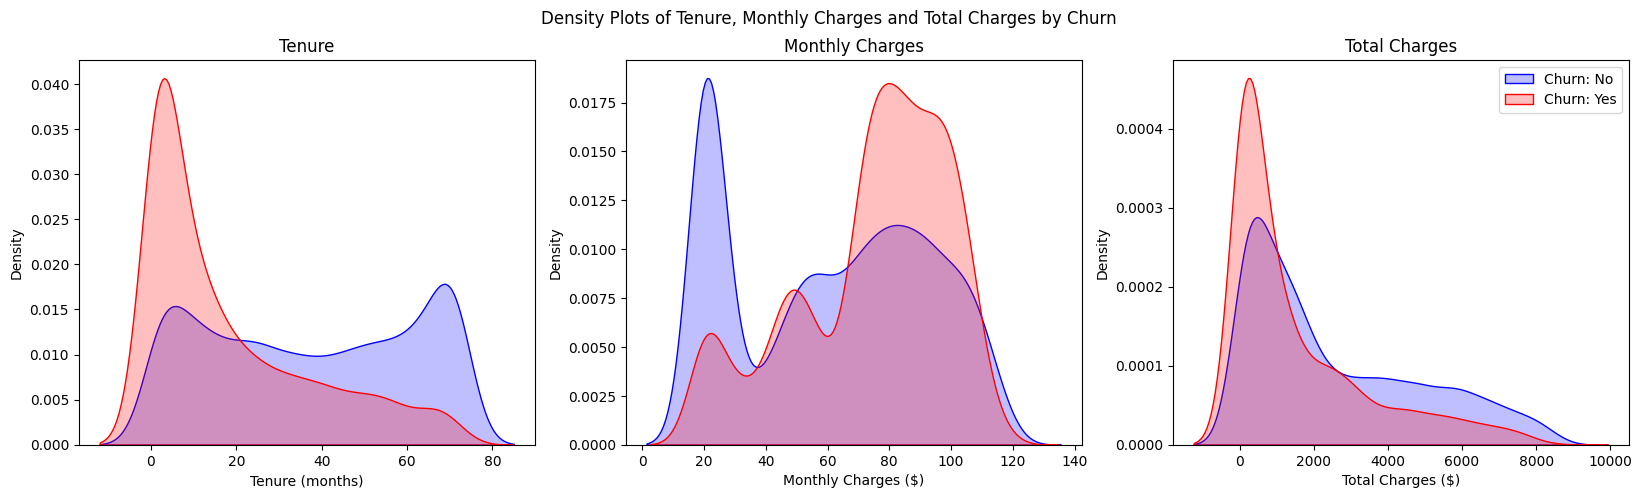

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot density plot for 'tenure' variable
sns.kdeplot(telco_churn_df_copy.loc[telco_churn_df_copy['Churn'] == 0, 'tenure'], color='blue', shade=True, ax=axs[0], label='Churn: No', hue_order=[0,1], legend=True)
sns.kdeplot(telco_churn_df_copy.loc[telco_churn_df_copy['Churn'] == 1, 'tenure'], color='red', shade=True, ax=axs[0], label='Churn: Yes', hue_order=[0,1], legend=True)
axs[0].set_xlabel('Tenure (months)')
axs[0].set_ylabel('Density')
axs[0].set_title('Tenure')

# Plot density plot for 'MonthlyCharges' variable
sns.kdeplot(telco_churn_df_copy.loc[telco_churn_df_copy['Churn'] == 0, 'MonthlyCharges'], color='blue', shade=True, ax=axs[1], label='Churn: No', hue_order=[0,1], legend=True)
sns.kdeplot(telco_churn_df_copy.loc[telco_churn_df_copy['Churn'] == 1, 'MonthlyCharges'], color='red', shade=True, ax=axs[1], label='Churn: Yes', hue_order=[0,1], legend=True)
axs[1].set_xlabel('Monthly Charges ($)')
axs[1].set_ylabel('Density')
axs[1].set_title('Monthly Charges')

# Plot density plot for 'TotalCharges' variable
sns.kdeplot(telco_churn_df_copy.loc[telco_churn_df_copy['Churn'] == 0, 'TotalCharges'], color='blue', shade=True, ax=axs[2], label='Churn: No', hue_order=[0,1], legend=True)
sns.kdeplot(telco_churn_df_copy.loc[telco_churn_df_copy['Churn'] == 1, 'TotalCharges'], color='red', shade=True, ax=axs[2], label='Churn: Yes', hue_order=[0,1], legend=True)
axs[2].set_xlabel('Total Charges ($)')
axs[2].set_ylabel('Density')
axs[2].set_title('Total Charges')

fig.suptitle('Density Plots of Tenure, Monthly Charges and Total Charges by Churn')
plt.legend()
plt.show()

By visualizing the distributions of numerical variables by churn, we notice the following:

1. Customers who churn out have a low tenure - logically makes sense, majority seem like new customers who unsubscribe
2. Customers who churn out tend to have high monthly charges compared to the ones who don't churn out
3. Distribution of Total Charges are more or less the same for both customer types

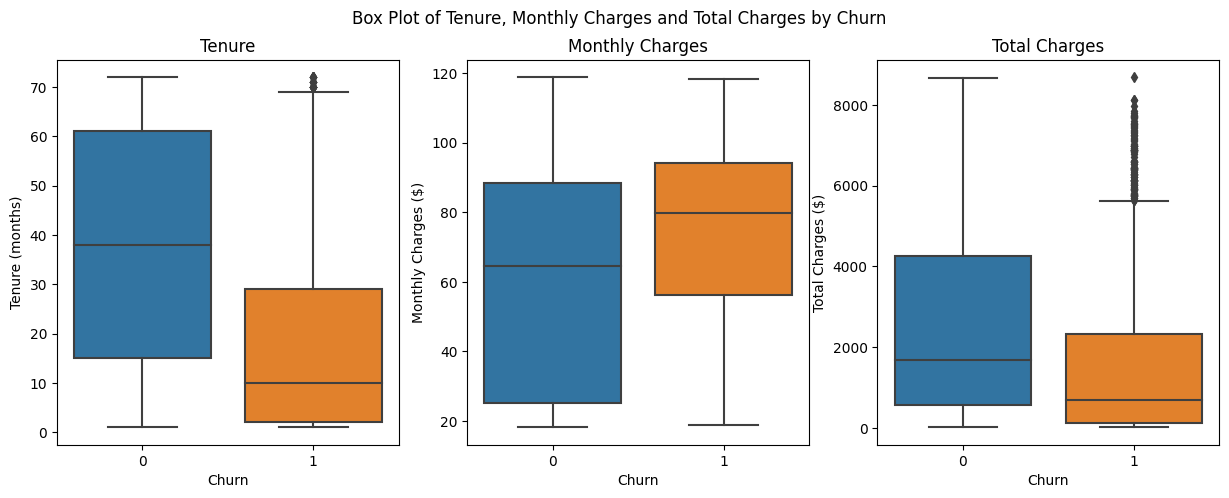

In [ ]:
# Visualizing distributions with boxplots to detect outliers

import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot box plot for 'tenure' variable
sns.boxplot(x='Churn', y='tenure', data=telco_churn_df_copy, ax=axs[0])
axs[0].set_xlabel('Churn')
axs[0].set_ylabel('Tenure (months)')
axs[0].set_title('Tenure')

# Plot box plot for 'MonthlyCharges' variable
sns.boxplot(x='Churn', y='MonthlyCharges', data=telco_churn_df_copy, ax=axs[1])
axs[1].set_xlabel('Churn')
axs[1].set_ylabel('Monthly Charges ($)')
axs[1].set_title('Monthly Charges')

# Plot box plot for 'TotalCharges' variable
sns.boxplot(x='Churn', y='TotalCharges', data=telco_churn_df_copy, ax=axs[2])
axs[2].set_xlabel('Churn')
axs[2].set_ylabel('Total Charges ($)')
axs[2].set_title('Total Charges')

fig.suptitle('Box Plot of Tenure, Monthly Charges and Total Charges by Churn')
plt.show()

From the boxplots above, we observe the following:

1. The median of Tenure for non-churn customers is higher and around 40 months. Most of the data points for churn customers lie in the initial 2 quartiles (as indicated by the small whiskers). Churn customers seem to have a few outliers
2. The median monthly charges of churn customers is higher. There seem to be no outliers
3. The median of total charges of churn customers is lower (as expected - mostly new customers who unsubscribe). However, churn customers seem to have many outliers. They might be customers who have had less tenure but paid high rates or customers who unsubscribed after spending a considerable time with the telecom provider. This could be valuable information for predicting churn and hence, outlier treatment might not be the best option

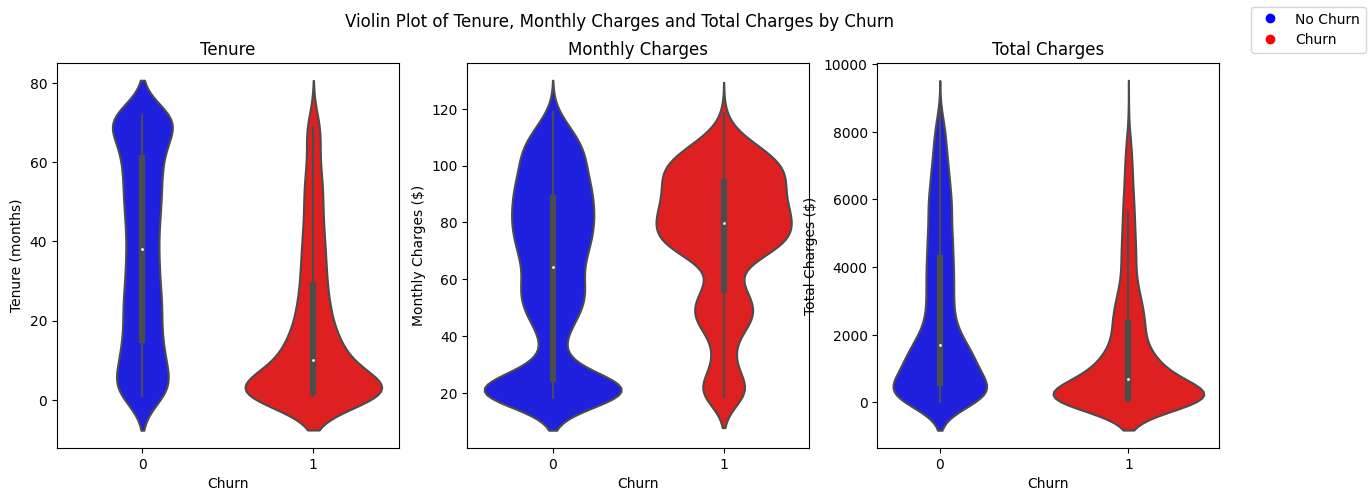

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot violin plot for 'tenure' variable
sns.violinplot(x='Churn', y='tenure', data=telco_churn_df_copy, ax=axs[0], palette=['blue', 'red'])
axs[0].set_xlabel('Churn')
axs[0].set_ylabel('Tenure (months)')
axs[0].set_title('Tenure')

# Plot violin plot for 'MonthlyCharges' variable
sns.violinplot(x='Churn', y='MonthlyCharges', data=telco_churn_df_copy, ax=axs[1], palette=['blue', 'red'])
axs[1].set_xlabel('Churn')
axs[1].set_ylabel('Monthly Charges ($)')
axs[1].set_title('Monthly Charges')

# Plot violin plot for 'TotalCharges' variable
sns.violinplot(x='Churn', y='TotalCharges', data=telco_churn_df_copy, ax=axs[2], palette=['blue', 'red'])
axs[2].set_xlabel('Churn')
axs[2].set_ylabel('Total Charges ($)')
axs[2].set_title('Total Charges')

# Add legend to the figure
handles = [plt.plot([],[], color='blue', marker="o", ls="", label='No Churn')[0],
           plt.plot([],[], color='red', marker="o", ls="", label='Churn')[0]]
fig.legend(handles=handles, labels=['No Churn', 'Churn'], loc='upper right')

fig.suptitle('Violin Plot of Tenure, Monthly Charges and Total Charges by Churn')
plt.show()

This gives us a better picture of distribution of data points (for numerical variables) for churn and non churn customers

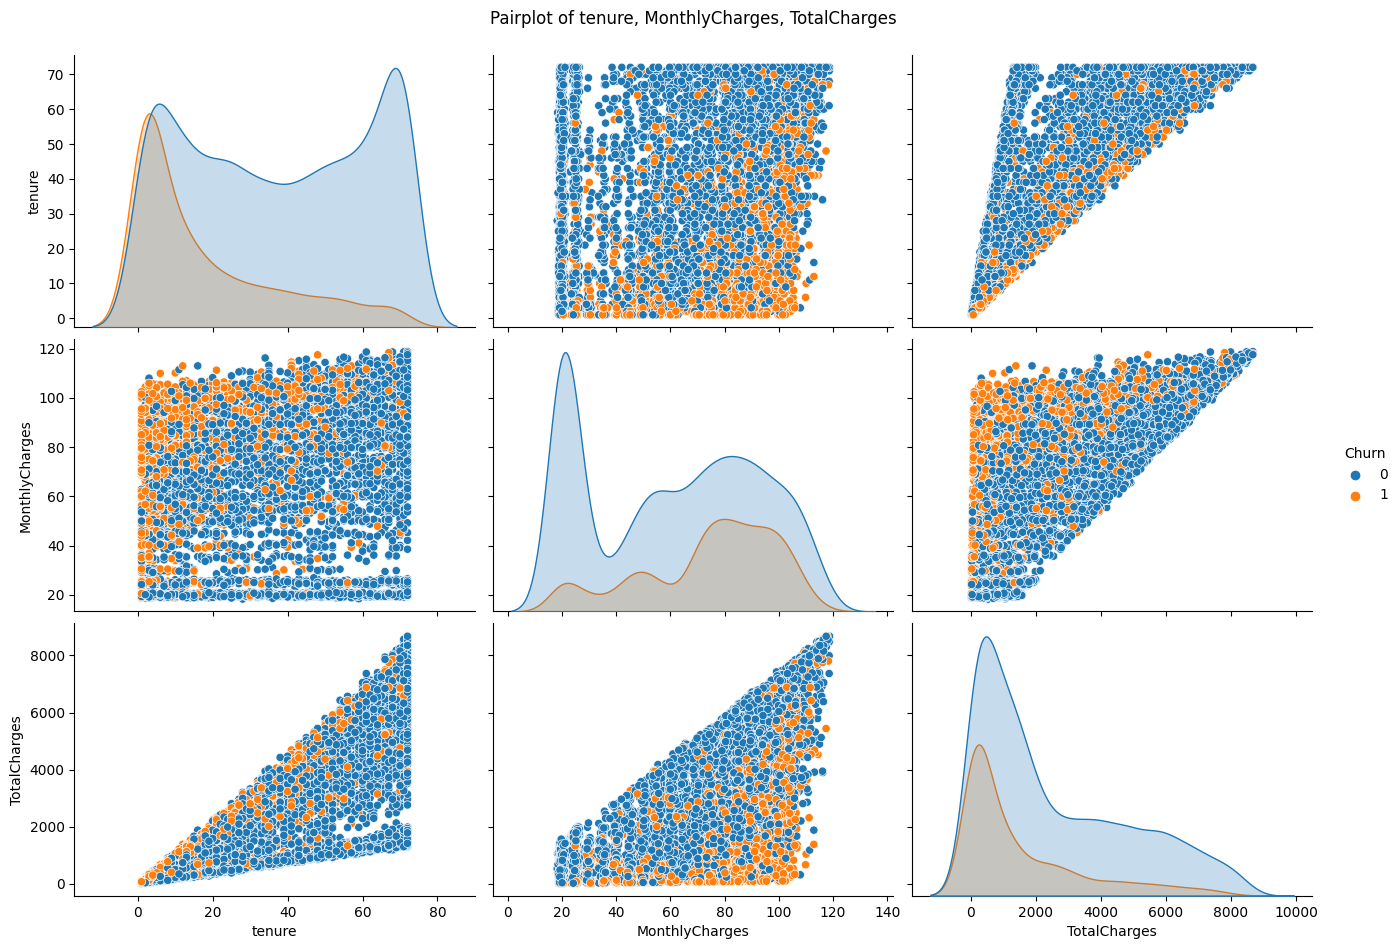

In [ ]:
### Creating a pairplot for numerical variables

import seaborn as sns

pairplot = sns.pairplot(data = telco_churn_df_copy, vars=["tenure", "MonthlyCharges", "TotalCharges"], hue="Churn", height=3, aspect=1.5)

# Add a title
pairplot.fig.suptitle('Pairplot of tenure, MonthlyCharges, TotalCharges', y=1.05)

# Adjust subplot parameters to fix title overlap
plt.subplots_adjust(top=1)

plt.show()

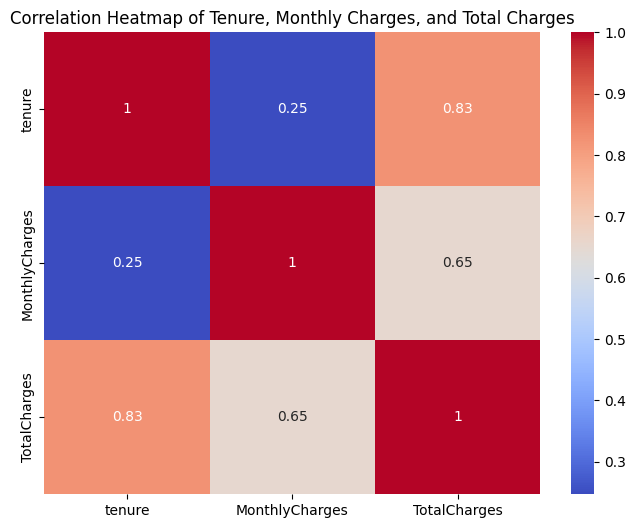

In [ ]:
### Creating a correlation heatmap of numerical variables

import seaborn as sns
import matplotlib.pyplot as plt

# create a subset of the dataframe with only the columns of interest
subset_df = telco_churn_df_copy[['tenure', 'MonthlyCharges', 'TotalCharges']]

# calculate the correlation matrix
corr_matrix = subset_df.corr()

# plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Tenure, Monthly Charges, and Total Charges')
plt.show()

1. Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. From the above heatmap, we can see that tenure and total charges are highly correlated
2. The other variable combinations - monthly charges and total charges, tenure and monthly charges - don't have a strong correlation

## Visualizing distribution of categorical and binary variables

In [ ]:
telco_churn_df_copy.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
telco_churn_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


In [ ]:
telco_churn_df_copy = telco_churn_df_copy.reset_index(drop=True)


In [ ]:
telco_churn_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


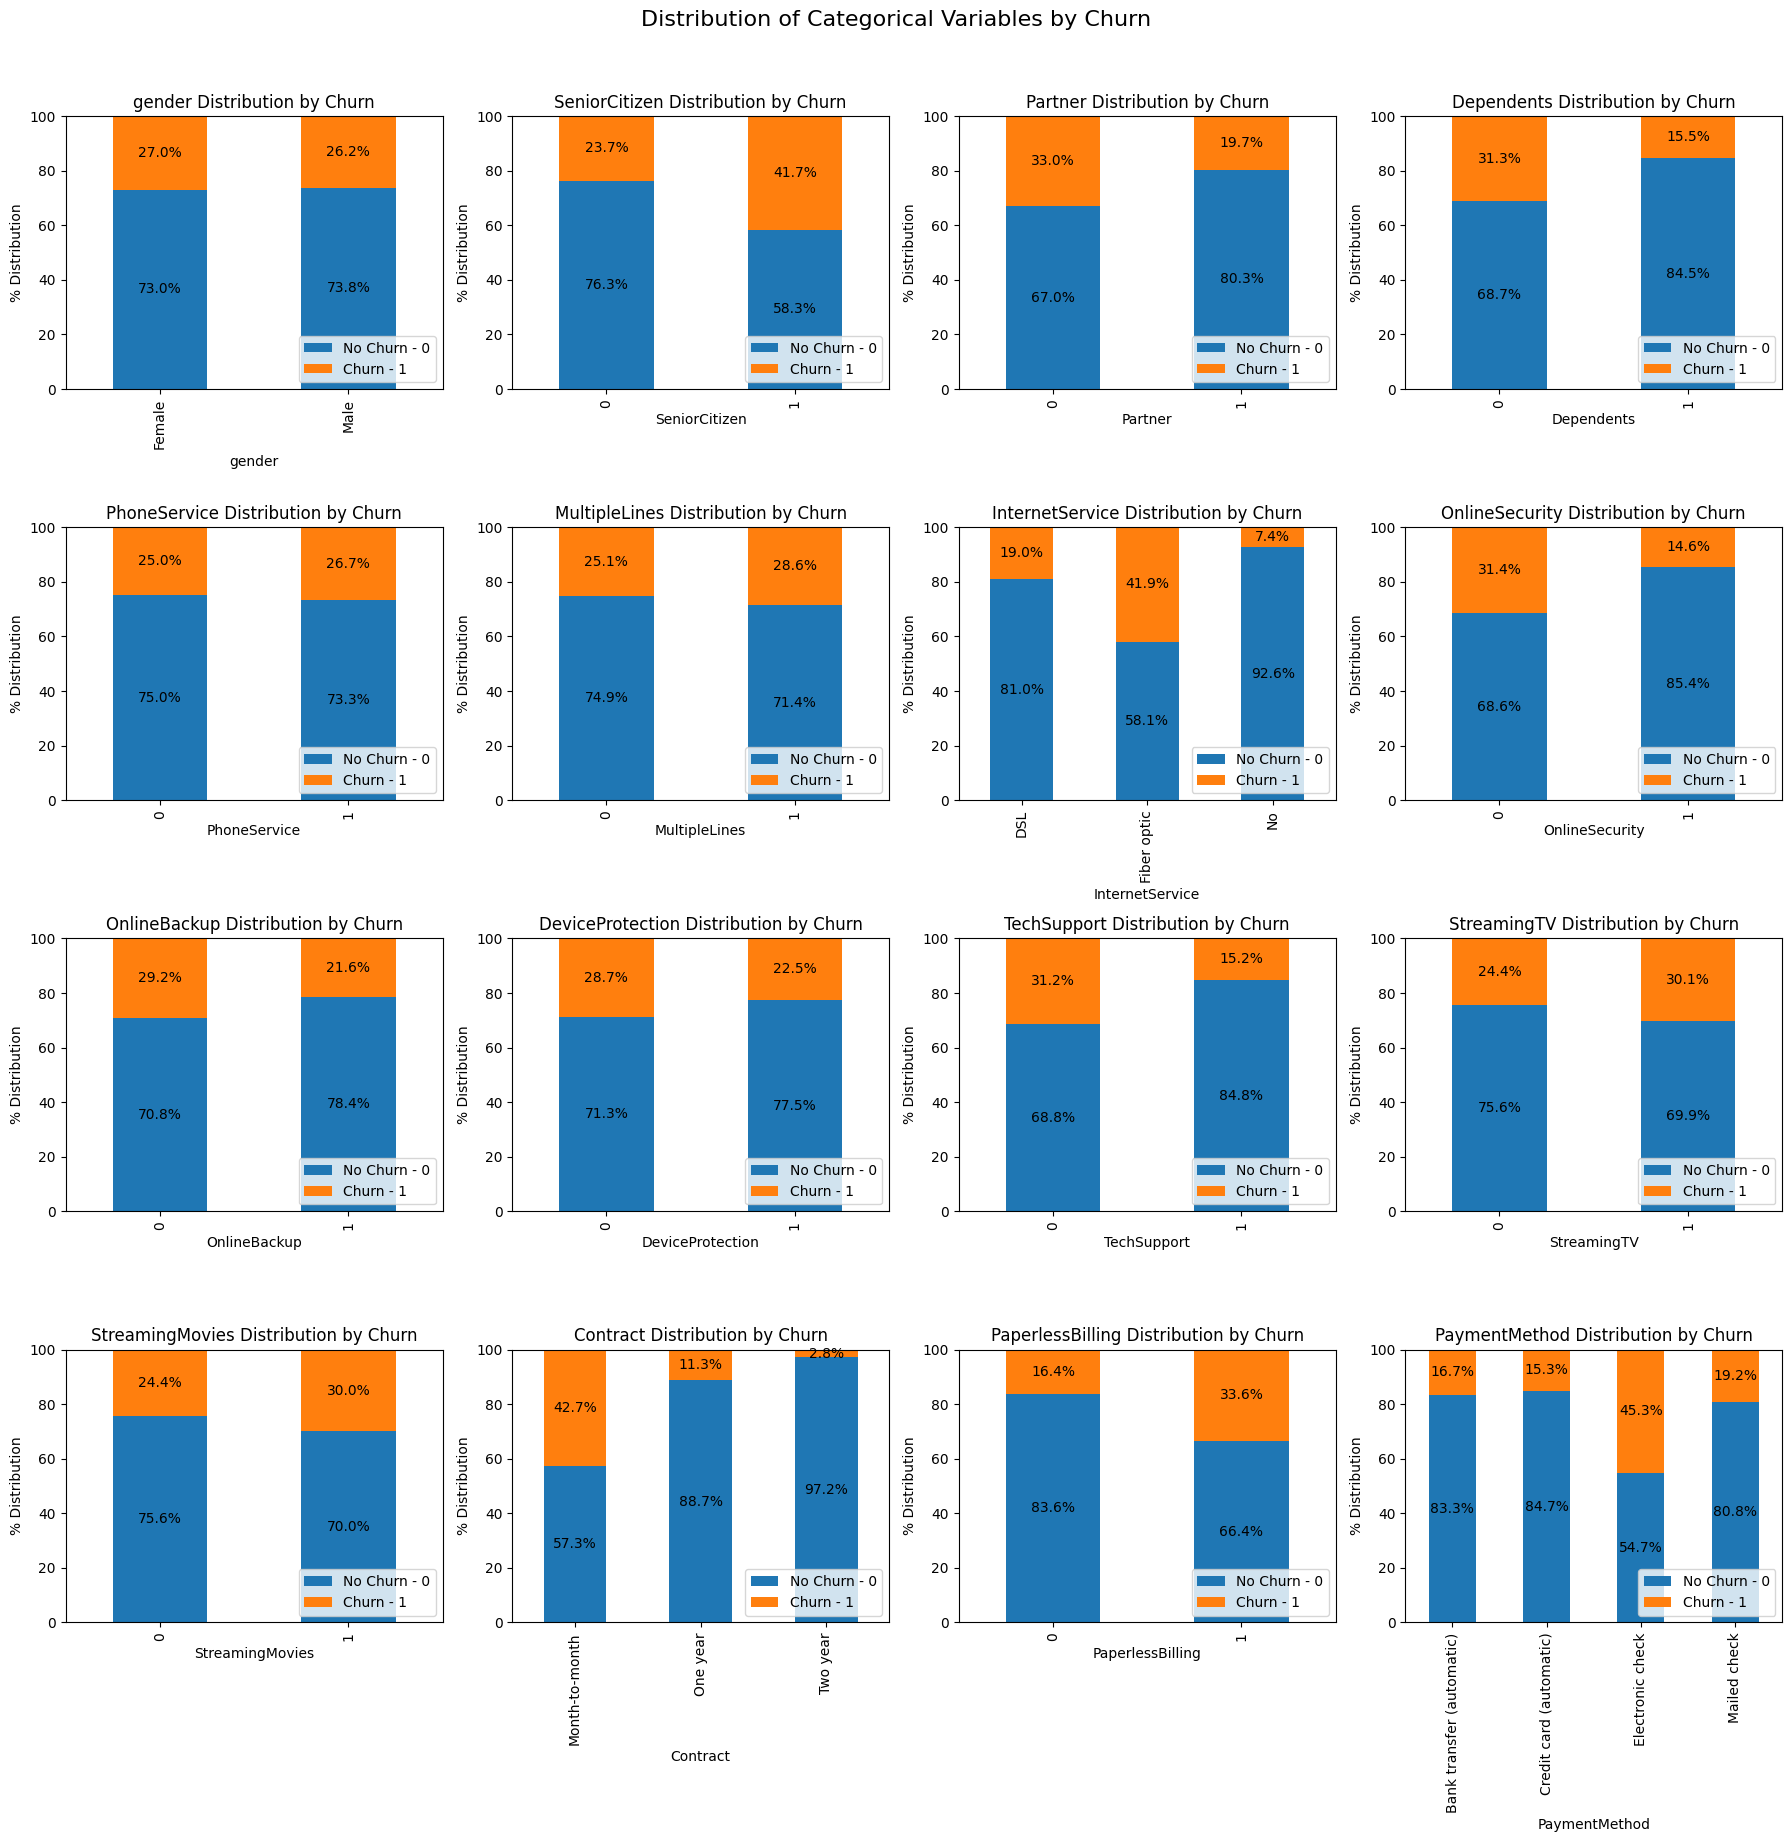

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Getting the list of categorical columns
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

### Setting up the plot layout
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 18))
axes = axes.flatten()

### Looping through each categorical column and creating a stacked bar chart with percentage distribution
for i, col in enumerate(categorical_cols):
    churn_grouped = telco_churn_df_copy.groupby([col, 'Churn']).size().unstack()
    churn_percent = churn_grouped.div(churn_grouped.sum(axis=1), axis=0) * 100
    churn_percent.plot.bar(stacked=True, ax=axes[i])

    # Adding labels to the stacked bars
    patches = axes[i].patches
    for j in range(len(patches)//2):
        p1 = patches[j]
        p2 = patches[len(patches)//2+j]
        axes[i].annotate(f"{churn_percent.iloc[j,0]:.1f}%", (p1.get_x() + p1.get_width() / 2., p1.get_y() + p1.get_height() / 2.), 
                         ha = 'center', va = 'center', xytext = (0, 0), textcoords = 'offset points')
        axes[i].annotate(f"{churn_percent.iloc[j,1]:.1f}%", (p2.get_x() + p2.get_width() / 2., p2.get_y() + p2.get_height() / 2.), 
                         ha = 'center', va = 'center', xytext = (0, 0), textcoords = 'offset points')

    # Labeling axes, title and adding legend
    axes[i].set_title(f'{col} Distribution by Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('% Distribution')
    axes[i].set_ylim([0, 100])
    axes[i].legend(['No Churn - 0', 'Churn - 1'], loc='lower right')

### Adjusting the plot layout and displaying the plot
fig.suptitle('Distribution of Categorical Variables by Churn', fontsize=16, y=1.02)
fig.tight_layout(pad=1)
plt.show()

On examining the relationship of every categorical variable with the dependent variable (Churn), we observe the following:

1. Senior Citizens have a higher churn %
2. The ones with Partners or Dependents are less likely to Churn
3. Customers with Fiber Optic Internet Service are more likely to Churn (41.9%) followed by DSL and No Internet Service
4. The ones without online security have a slightly higher churn % distribution
5. The ones with a Month-to-Month contract have a higher likelihood to churn out - Other yearly subscriptions can be merged into one category
6. The ones with Paperless billing have a higher churn %
7. The ones that have electronic check as payment method have a higher churn % - other payment categories can be merged into one category
8. The following variables have minute differences when it comes to the distribution of churn to no churn. Hence, they probably aren't the best predictors when it comes to predicting churn - Gender, Phone Service, Multiple Lines, Online Backup, Device Protection, Streaming TV, and Streaming Movies (7/16 variables aren't related to churn as much as others)

# Data Processing

## Doing PCA for numerical variables

In [ ]:
# Importing PCA and StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extracting the numerical columns
numerical_variables = ["tenure", "MonthlyCharges", "TotalCharges"]
numerical_df = telco_churn_df_copy[numerical_variables]
numerical_df.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [ ]:
numerical_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
# Standardizing the data as the scale range of each column is different
scaler = StandardScaler()
numerical_df_scaled = scaler.fit_transform(numerical_df)
print(numerical_df_scaled)

[[-1.28024804 -1.16169394 -0.99419409]
 [ 0.06430269 -0.26087792 -0.17373982]
 [-1.23950408 -0.36392329 -0.95964911]
 ...
 [-0.87280842 -1.17000405 -0.85451414]
 [-1.15801615  0.31916782 -0.87209546]
 [ 1.36810945  1.35793167  2.01234407]]


In [ ]:
# Performing PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(numerical_df_scaled)
pca_components

array([[-1.95165689,  0.08275258, -0.40146869],
       [-0.20579255,  0.23514165,  0.06881485],
       [-1.51808264, -0.52254219, -0.11005311],
       ...,
       [-1.63168822,  0.34516629, -0.28169523],
       [-1.08184347, -1.00900265,  0.12226347],
       [ 2.77397648, -0.12278947, -0.23496341]])

In [ ]:
# Checking the variance captured
explained_variance_ratio = pca.explained_variance_ratio_
cummulative_variance = pca.explained_variance_ratio_.cumsum()

print(f"Explained variance ratio: {explained_variance_ratio}")
print(f"Cummulative variance captured by the PCs: {cummulative_variance}")

### First 2 components capture 98% of the variance in the data.

Explained variance ratio: [0.72659927 0.25358707 0.01981367]
Cummulative variance captured by the PCs: [0.72659927 0.98018633 1.        ]


In [ ]:
### Storing the first 2 PCs in a df
pca_df = pd.DataFrame(data=pca_components[:, :2], columns=["PC1", "PC2"])
pca_df.head()

,PC1,PC2
0,-1.951657,0.082753
1,-0.205793,0.235142
2,-1.518083,-0.522542
3,-0.202412,0.891730
4,-1.233269,-0.965181


In [ ]:
### Adding the PCs as columns in the original df
telco_churn_df_copy = pd.concat([telco_churn_df_copy, pca_df], axis=1)
telco_churn_df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PC1,PC2
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,-1.951657,0.082753
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,-0.205793,0.235142
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,-1.518083,-0.522542
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,-0.202412,0.891730
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,-1.233269,-0.965181


In [ ]:
telco_churn_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


## Combining categories in Payment Method and Contract to reduce dimensions

In [ ]:
telco_churn_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


In [ ]:
telco_churn_df_copy.groupby('PaymentMethod', as_index=False).size()

,PaymentMethod,size
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521
2,Electronic check,2365
3,Mailed check,1604


In [ ]:
### Combining Bank transfer, Credit card and Mailed check into one category
telco_churn_df_copy['PaymentMethod'] = telco_churn_df_copy['PaymentMethod'].replace(['Bank transfer (automatic)', 'Credit card (automatic)', 'Mailed check'], 'Bank Transfer/Credit Card/Mailed Check')

In [ ]:
telco_churn_df_copy.groupby('PaymentMethod', as_index=False).size()

,PaymentMethod,size
0,Bank Transfer/Credit Card/Mailed Check,4667
1,Electronic check,2365


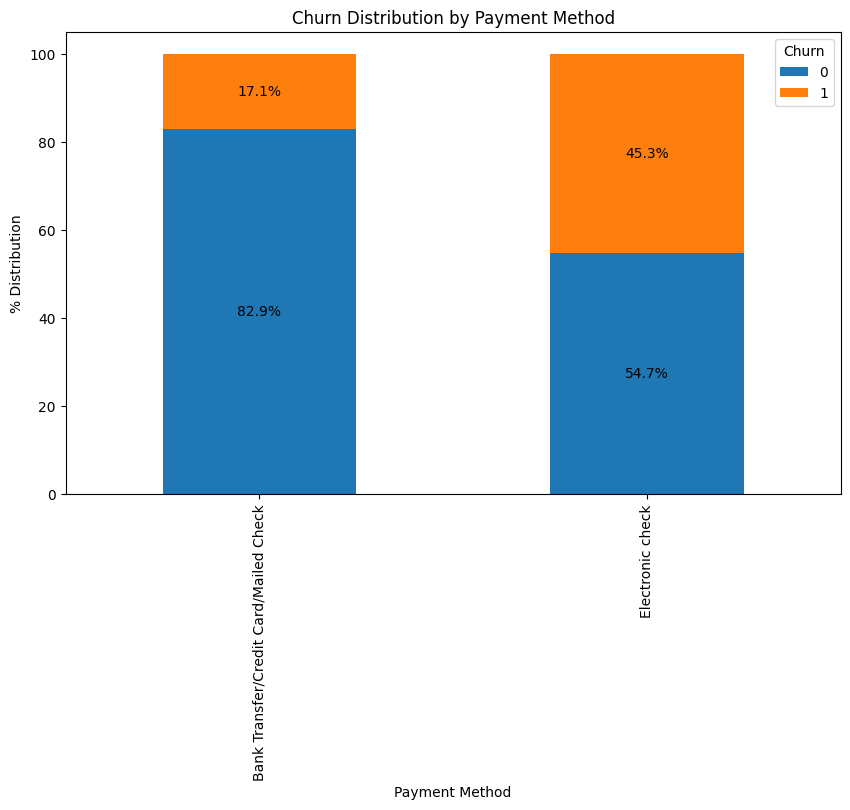

In [ ]:
import matplotlib.pyplot as plt

# Create contingency table and normalize by row
table = pd.crosstab(telco_churn_df_copy['PaymentMethod'], telco_churn_df_copy['Churn'], normalize='index') * 100

# Create stacked bar chart
ax = table.plot(kind='bar', stacked=True, legend=True, figsize=(10, 6))

# Add labels and title
ax.set_xlabel('Payment Method')
ax.set_ylabel('% Distribution')
ax.set_title('Churn Distribution by Payment Method')

# Display percentage values on each stack
for i, patch in enumerate(ax.containers):
    for j, rect in enumerate(patch.patches):
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height() / 2, f'{table.iloc[j, i]:.1f}%', ha='center', va='center')

# Show the plot
plt.show()

In [ ]:
telco_churn_df_copy.groupby('Contract', as_index=False).size()

,Contract,size
0,Month-to-month,3875
1,One year,1472
2,Two year,1685


In [ ]:
### Combining One year, Two year as 'Yearly Subscriptions'
telco_churn_df_copy['Contract'] = telco_churn_df_copy['Contract'].replace(['One year', 'Two year'], 'Yearly Subscriptions')

In [ ]:
telco_churn_df_copy.groupby('Contract', as_index=False).size()

,Contract,size
0,Month-to-month,3875
1,Yearly Subscriptions,3157


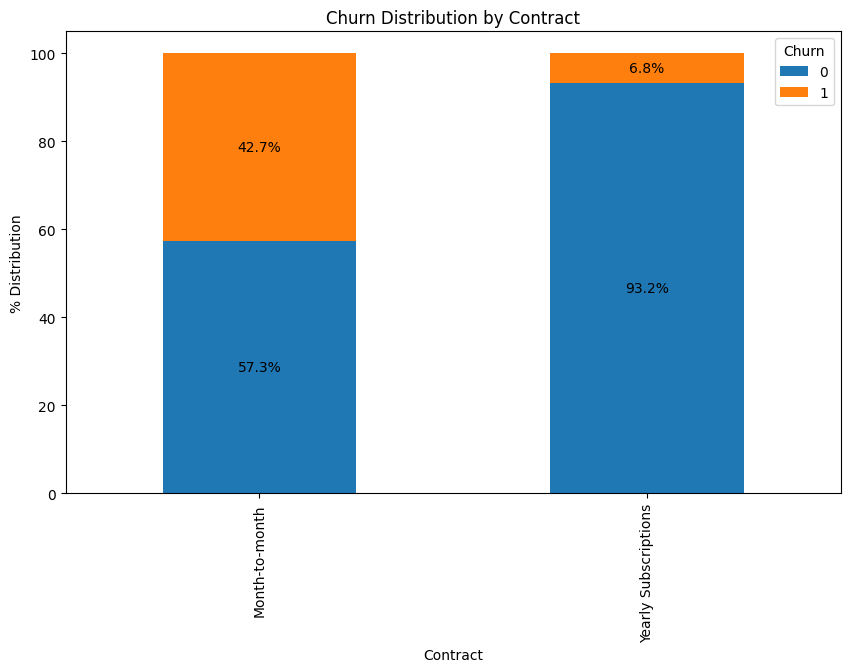

In [ ]:
import matplotlib.pyplot as plt

# Create contingency table and normalize by row
table = pd.crosstab(telco_churn_df_copy['Contract'], telco_churn_df_copy['Churn'], normalize='index') * 100

# Create stacked bar chart
ax = table.plot(kind='bar', stacked=True, legend=True, figsize=(10, 6))

# Add labels and title
ax.set_xlabel('Contract')
ax.set_ylabel('% Distribution')
ax.set_title('Churn Distribution by Contract')

# Display percentage values on each stack
for i, patch in enumerate(ax.containers):
    for j, rect in enumerate(patch.patches):
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + rect.get_height() / 2, f'{table.iloc[j, i]:.1f}%', ha='center', va='center')

# Show the plot
plt.show()

## One-hot encoding of numerical variables

In [ ]:
### Creating dummy variables for the 3 non-binary categorical columns
telco_churn_df_one_hot_encoding = pd.get_dummies(telco_churn_df_copy, columns=['PaymentMethod', 'Contract', 'InternetService', 'gender'])
telco_churn_df_one_hot_encoding.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PC1,PC2,PaymentMethod_Bank Transfer/Credit Card/Mailed Check,PaymentMethod_Electronic check,Contract_Month-to-month,Contract_Yearly Subscriptions,InternetService_DSL,InternetService_Fiber optic,InternetService_No,gender_Female,gender_Male
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,-1.951657,0.082753,0,1,1,0,1,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,-0.205793,0.235142,1,0,0,1,1,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,-1.518083,-0.522542,1,0,1,0,1,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,-0.202412,0.891730,1,0,0,1,1,0,0,0,1
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,-1.233269,-0.965181,0,1,1,0,0,1,0,1,0


In [ ]:
telco_churn_df_one_hot_encoding

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PC1,PC2,PaymentMethod_Bank Transfer/Credit Card/Mailed Check,PaymentMethod_Electronic check,Contract_Month-to-month,Contract_Yearly Subscriptions,InternetService_DSL,InternetService_Fiber optic,InternetService_No,gender_Female,gender_Male
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,-1.951657,0.082753,0,1,1,0,1,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,-0.205793,0.235142,1,0,0,1,1,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,-1.518083,-0.522542,1,0,1,0,1,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,-0.202412,0.891730,1,0,0,1,1,0,0,0,1
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,-1.233269,-0.965181,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,0.042387,-0.742983,1,0,0,1,1,0,0,0,1
7028,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,3.025198,0.104080,1,0,0,1,0,1,0,1,0
7029,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,-1.631688,0.345166,0,1,1,0,1,0,0,1,0
7030,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,-1.081843,-1.009003,1,0,1,0,0,1,0,0,1


In [ ]:
# As a column with m values gets reduced to m dummies, but we only need m-1 columns to reduce redundancy (to avoid overfitting), we are dropping the additional columns
telco_churn_df_one_hot_encoding.drop(["PaymentMethod_Bank Transfer/Credit Card/Mailed Check", "Contract_Yearly Subscriptions", "InternetService_No", "gender_Female"], inplace = True, axis = 1)

NOTE:

1. If PaymentMethod_Electronic check are 0, then it is PaymentMethod_Bank Transfer/Credit Card/Mailed Check
2. If Contract_Month-to-month is 0, then it is Contract_Yearly Subscriptions
3. If InternetService_DSL and InternetService_Fiber optic are 0s, then it is InternetService_No

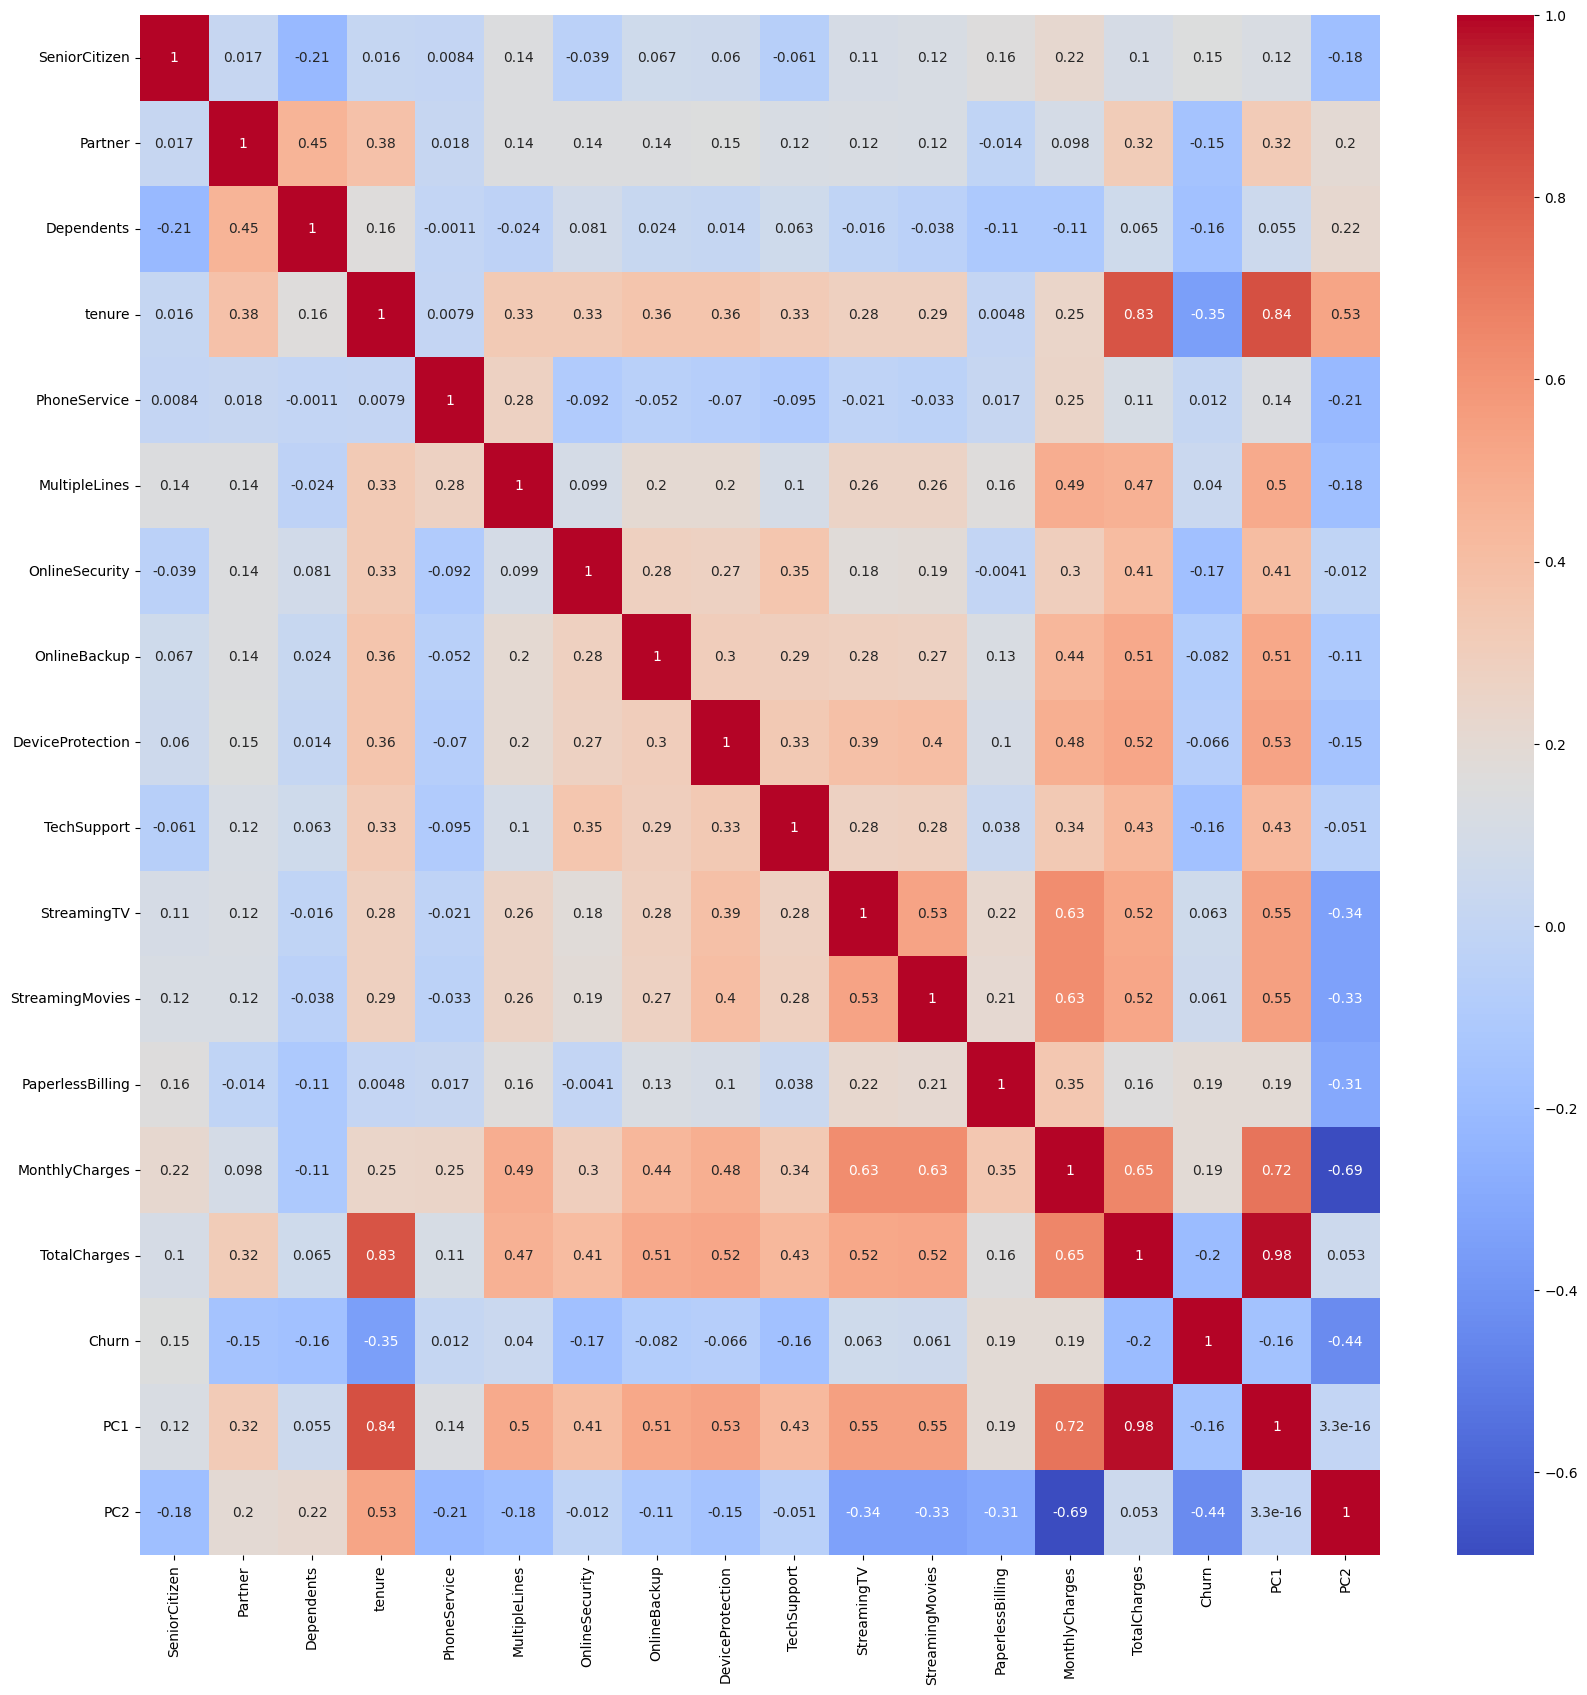

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 20))

# Compute pairwise correlation between columns
corr_matrix = telco_churn_df_copy.corr()

# Create heatmap of correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

### We don't observe any columns that are highly correlated except for tenure and total charges, which we've already used PCA

In [ ]:
### Dropping redundant columns or columns that aren't associated to churn:
# gender, PhoneService, MultipleLines, OnlineBackup, DeviceProtection, StreamingTV, StreamingMovies, tenure, MonthlyCharges, TotalCharges 
telco_churn_df_reduced = telco_churn_df_one_hot_encoding.drop(['PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)
telco_churn_df_reduced.head()

,SeniorCitizen,Partner,Dependents,OnlineSecurity,TechSupport,PaperlessBilling,Churn,PC1,PC2,PaymentMethod_Electronic check,Contract_Month-to-month,InternetService_DSL,InternetService_Fiber optic,gender_Male
0,0,1,0,0,0,1,0,-1.951657,0.082753,1,1,1,0,0
1,0,0,0,1,0,0,0,-0.205793,0.235142,0,0,1,0,1
2,0,0,0,1,0,1,1,-1.518083,-0.522542,0,1,1,0,1
3,0,0,0,1,1,0,0,-0.202412,0.891730,0,0,1,0,1
4,0,0,0,0,0,1,1,-1.233269,-0.965181,1,1,0,1,0


In [ ]:
telco_churn_df_one_hot_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SeniorCitizen                   7032 non-null   int64  
 1   Partner                         7032 non-null   int64  
 2   Dependents                      7032 non-null   int64  
 3   tenure                          7032 non-null   int64  
 4   PhoneService                    7032 non-null   int64  
 5   MultipleLines                   7032 non-null   int64  
 6   OnlineSecurity                  7032 non-null   int64  
 7   OnlineBackup                    7032 non-null   int64  
 8   DeviceProtection                7032 non-null   int64  
 9   TechSupport                     7032 non-null   int64  
 10  StreamingTV                     7032 non-null   int64  
 11  StreamingMovies                 7032 non-null   int64  
 12  PaperlessBilling                70

In [ ]:
telco_churn_df_one_hot_encoding.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PC1,PC2,PaymentMethod_Electronic check,Contract_Month-to-month,InternetService_DSL,InternetService_Fiber optic,gender_Male
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,-1.951657,0.082753,1,1,1,0,0
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,-0.205793,0.235142,0,0,1,0,1
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,-1.518083,-0.522542,0,1,1,0,1
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,-0.202412,0.891730,0,0,1,0,1
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,-1.233269,-0.965181,1,1,0,1,0


In [ ]:
import scipy.stats as stats

categorical_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'PaperlessBilling', 'PaymentMethod_Electronic check',
                    'Contract_Month-to-month', 'InternetService_DSL', 'InternetService_Fiber optic',
                    'gender_Male']

for col in categorical_cols:
    contingency_table = pd.crosstab(telco_churn_df_one_hot_encoding[col], telco_churn_df_one_hot_encoding['Churn'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"\nContingency table for {col} and Churn:\n{contingency_table}\n")
    print(f"Chi-squared test results for {col} and Churn:\nchi2 = {chi2}\np-value = {p}\ndof = {dof}\n")
    if p < 0.05:
        print(f"There is a significant association between {col} and Churn with p-value {p}.\n")
    else:
        print(f"There is no significant association between {col} and Churn with p-value {p}.\n")

    print('--------------------------------------------------------------------------------------------------------')


Contingency table for SeniorCitizen and Churn:
Churn             0     1
SeniorCitizen            
0              4497  1393
1               666   476

Chi-squared test results for SeniorCitizen and Churn:
chi2 = 158.4408162893713
p-value = 2.4792557203954705e-36
dof = 1

There is a significant association between SeniorCitizen and Churn with p-value 2.4792557203954705e-36.

--------------------------------------------------------------------------------------------------------

Contingency table for Partner and Churn:
Churn       0     1
Partner            
0        2439  1200
1        2724   669

Chi-squared test results for Partner and Churn:
chi2 = 157.50315146557506
p-value = 3.97379757451591e-36
dof = 1

There is a significant association between Partner and Churn with p-value 3.97379757451591e-36.

--------------------------------------------------------------------------------------------------------

Contingency table for Dependents and Churn:
Churn          0     1
Dependent

In [ ]:
import scipy.stats as stats

categorical_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'PaperlessBilling', 'PaymentMethod_Electronic check',
                    'Contract_Month-to-month', 'InternetService_DSL', 'InternetService_Fiber optic',
                    'gender_Male']

for col in categorical_cols:
    contingency_table = pd.crosstab(telco_churn_df_one_hot_encoding[col], telco_churn_df_one_hot_encoding['Churn'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Contingency table for {col} and Churn:".ljust(40), end=' ')
    print(f"Chi-squared test results for {col} and Churn:")
    print(f"{contingency_table}".ljust(40), end=' ')
    print(f"chi2 = {chi2:.2f}, p-value = {p:.2e}, dof = {dof}")
    if p < 0.05:
        print(f"There is a significant association between {col} and Churn with p-value {p:.2e}.\n")
    else:
        print(f"There is NO SIGNIFICANT ASSOCIATION between {col} and Churn with p-value {p:.2e}.\n")

    print('----------------------------------------------------------------------------------------------------------------------')


Contingency table for SeniorCitizen and Churn: Chi-squared test results for SeniorCitizen and Churn:
Churn             0     1
SeniorCitizen            
0              4497  1393
1               666   476 chi2 = 158.44, p-value = 2.48e-36, dof = 1
There is a significant association between SeniorCitizen and Churn with p-value 2.48e-36.

----------------------------------------------------------------------------------------------------------------------
Contingency table for Partner and Churn: Chi-squared test results for Partner and Churn:
Churn       0     1
Partner            
0        2439  1200
1        2724   669 chi2 = 157.50, p-value = 3.97e-36, dof = 1
There is a significant association between Partner and Churn with p-value 3.97e-36.

----------------------------------------------------------------------------------------------------------------------
Contingency table for Dependents and Churn: Chi-squared test results for Dependents and Churn:
Churn          0     1
Dependen

In [ ]:
telco_churn_df_reduced.head()

,SeniorCitizen,Partner,Dependents,OnlineSecurity,TechSupport,PaperlessBilling,Churn,PC1,PC2,PaymentMethod_Electronic check,Contract_Month-to-month,InternetService_DSL,InternetService_Fiber optic,gender_Male
0,0,1,0,0,0,1,0,-1.951657,0.082753,1,1,1,0,0
1,0,0,0,1,0,0,0,-0.205793,0.235142,0,0,1,0,1
2,0,0,0,1,0,1,1,-1.518083,-0.522542,0,1,1,0,1
3,0,0,0,1,1,0,0,-0.202412,0.891730,0,0,1,0,1
4,0,0,0,0,0,1,1,-1.233269,-0.965181,1,1,0,1,0


In [ ]:
telco_churn_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SeniorCitizen                   7032 non-null   int64  
 1   Partner                         7032 non-null   int64  
 2   Dependents                      7032 non-null   int64  
 3   OnlineSecurity                  7032 non-null   int64  
 4   TechSupport                     7032 non-null   int64  
 5   PaperlessBilling                7032 non-null   int64  
 6   Churn                           7032 non-null   int64  
 7   PC1                             7032 non-null   float64
 8   PC2                             7032 non-null   float64
 9   PaymentMethod_Electronic check  7032 non-null   uint8  
 10  Contract_Month-to-month         7032 non-null   uint8  
 11  InternetService_DSL             7032 non-null   uint8  
 12  InternetService_Fiber optic     70

In [ ]:
df = telco_churn_df_reduced

Splitting the dataframe into 90-10

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is the original DataFrame
train, final_test = train_test_split(df, test_size=0.1, random_state=12)

In [ ]:
df.shape

(7032, 14)

In [ ]:
train.shape

(6328, 14)

In [ ]:
final_test.shape

(704, 14)

In [ ]:
df["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
train["Churn"].value_counts()

0    4639
1    1689
Name: Churn, dtype: int64

# Model Selection

## On imbalanced data

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate the target variable from the predictors
X = train.drop('Churn', axis=1)
y = train['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Initialize the logistic regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.79
Precision: 0.64
Recall: 0.50
F1 Score: 0.56


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


# Split data into train and test sets
X = train.drop('Churn', axis=1)
y = train['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred))

Naive Bayes Accuracy: 0.778041074249605
F1 Score: 0.5460992907801417


### Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier

# Split data into train and test sets
X = train.drop('Churn', axis=1)
y = train['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Neural network
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=12)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print('Neural Network Accuracy:', accuracy_score(y_test, y_pred_mlp))
print("F1 Score:", f1_score(y_test, y_pred))

Neural Network Accuracy: 0.778041074249605
F1 Score: 0.588628762541806


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X = train.drop('Churn', axis=1)
y = train['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


# Create and train the Gradient Boosting Classifier model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=12)
gb.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_pred = gb.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Gradient Boosting Classifier Accuracy:', accuracy)
print("F1 Score:", f1_score(y_test, y_pred))


Gradient Boosting Classifier Accuracy: 0.8056872037914692
F1 Score: 0.588628762541806


### Ensemble Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

# Split the data into training and testing sets
X = train.drop('Churn', axis=1)
y = train['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Create an ensemble of random forest classifiers
n_estimators = 100
max_depth = 5
max_features = "sqrt"
rfc = RandomForestClassifier(n_estimators=n_estimators,
                              max_depth=max_depth,
                              max_features=max_features)

# Fit the ensemble to the training data
rfc.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rfc.predict(X_test)

# Evaluate the performance of the ensemble
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.7977883096366508
Precision: 0.7
Recall: 0.4476744186046512
F1 Score: 0.5460992907801417


### Decision Trees, K-NN, Random Forest, SVC, and XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Load dataset and split into train and test sets
X = train.drop('Churn', axis=1)
y = train['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Train and evaluate Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Decision Tree - Accuracy: {:.3f}, F1-Score: {:.3f}".format(acc, f1))

# Train and evaluate K-Nearest Neighbors classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("K-Nearest Neighbors - Accuracy: {:.3f}, F1-Score: {:.3f}".format(acc, f1))

# Train and evaluate Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Random Forest - Accuracy: {:.3f}, F1-Score: {:.3f}".format(acc, f1))

# Train and evaluate Support Vector Machine classifier
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Support Vector Machine - Accuracy: {:.3f}, F1-Score: {:.3f}".format(acc, f1))

# Train and evaluate XGBoost classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("XGBoost - Accuracy: {:.3f}, F1-Score: {:.3f}".format(acc, f1))

Decision Tree - Accuracy: 0.731, F1-Score: 0.515
K-Nearest Neighbors - Accuracy: 0.777, F1-Score: 0.565
Random Forest - Accuracy: 0.780, F1-Score: 0.558
Support Vector Machine - Accuracy: 0.793, F1-Score: 0.566
XGBoost - Accuracy: 0.789, F1-Score: 0.577


## On balancing training data using SMOTE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

X = train.drop('Churn', axis=1)
y = train['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# Balance the data using SMOTE
oversampler = SMOTE(random_state=12)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize the models
models = [
    ('Gradient Boosting', GradientBoostingClassifier(random_state=12)),
    ('Neural Networks', MLPClassifier(random_state=12)),
    ('XGBoost', XGBClassifier(random_state=12)),
    ('SVC', SVC(random_state=12)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=12)),
    ('Naïve Bayes', GaussianNB()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=12)),
    ('Random Forest', RandomForestClassifier(random_state=12)),
    ('Ensemble Learning', VotingClassifier(estimators=[('SVC', SVC(random_state=12)),
                                                        ('Random Forest', RandomForestClassifier(random_state=12)),
                                                        ('Logistic Regression', LogisticRegression(random_state=12))]))
]

# Train and evaluate each model
results = []
for name, model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((name, accuracy, f1))

# Store the results in a dataframe
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score'])
results_df


,Model,Accuracy,F1 Score
0,Gradient Boosting,0.75,0.62
1,Neural Networks,0.75,0.61
2,XGBoost,0.75,0.61
3,SVC,0.75,0.63
4,K-Nearest Neighbors,0.71,0.57
5,Logistic Regression,0.76,0.64
6,Naïve Bayes,0.74,0.62
7,Decision Tree Classifier,0.70,0.52
8,Random Forest,0.76,0.60
9,Ensemble Learning,0.77,0.64


# Model Performance Evaluation and Interpretation

## Logistic Regression

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

X = train.drop('Churn', axis=1)
y = train['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

smote = SMOTE(sampling_strategy='minority', random_state=12)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

param_distributions = {
    'C': np.arange(0.01, 1, 0.01),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': np.arange(100, 1000, 100)
}

lr_model = LogisticRegression(random_state=12)

random_search = RandomizedSearchCV(estimator=lr_model, param_distributions=param_distributions,
                                   scoring='f1', n_iter=50, cv=5, random_state=12)

random_search.fit(X_train_resampled, y_train_resampled)

print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best F1 score: {random_search.best_score_}')

best_lr_model = LogisticRegression(**random_search.best_params_, random_state=12)
best_lr_model.fit(X_train_resampled, y_train_resampled)
y_pred = best_lr_model.predict(X_val)
print(classification_report(y_val, y_pred, digits=4))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = 2 * (ppv * sensitivity) / (ppv + sensitivity)
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'PPV: {ppv:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Best hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 800, 'fit_intercept': True, 'C': 0.27}
Best F1 score: 0.7710286460885465
              precision    recall  f1-score   support

           0     0.8989    0.7711    0.8301       922
           1     0.5558    0.7674    0.6447       344

    accuracy                         0.7701      1266
   macro avg     0.7273    0.7693    0.7374      1266
weighted avg     0.8056    0.7701    0.7797      1266

Confusion Matrix:
[[711 211]
 [ 80 264]]
Sensitivity: 0.7674
Specificity: 0.7711
PPV: 0.5558
Accuracy: 0.7701


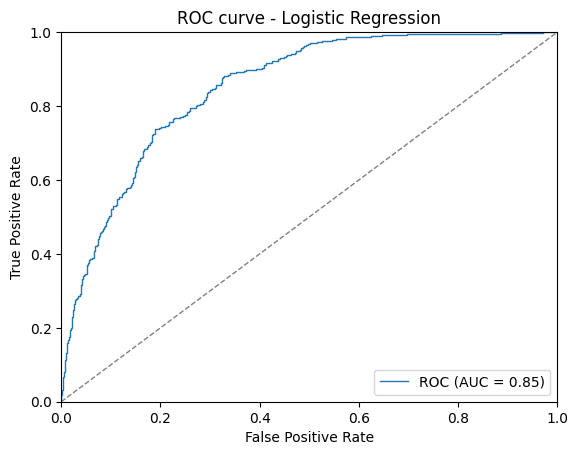

In [ ]:
# Calculate and plot ROC curve
y_pred_proba = best_lr_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
confusion_df = pd.DataFrame(confusion_matrix(y_val, y_pred), columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

# Print the dataframe
confusion_df

,Predicted Negative,Predicted Positive
Actual Negative,711,211
Actual Positive,80,264


## Random Forest

Best hyperparameters: {'n_estimators': 460, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 9}
Best F1 score: 0.8102304721513507
              precision    recall  f1-score   support

           0     0.8841    0.7939    0.8366       922
           1     0.5662    0.7209    0.6343       344

    accuracy                         0.7741      1266
   macro avg     0.7251    0.7574    0.7354      1266
weighted avg     0.7977    0.7741    0.7816      1266

Confusion Matrix:
[[732 190]
 [ 96 248]]
Sensitivity: 0.7209
Specificity: 0.7939
PPV: 0.5662
Accuracy: 0.7741


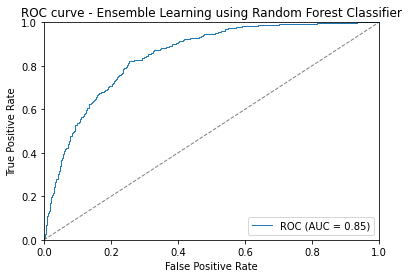

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load the data into a Pandas dataframe
data = train.copy()

# Split the data into train and validation sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

# Resample the training set using SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=12)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the hyperparameter grid for random search
param_distributions = {
    'max_depth': np.arange(2, 10),
    'n_estimators': np.arange(50, 500, 10),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define the Random Forest classifier model
rf_model = RandomForestClassifier(random_state=12)

# Wrap the Random Forest model using the RandomizedSearchCV wrapper for use in RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions,
                                   scoring='f1', n_iter=50, cv=5, random_state=12)

# Perform random search with cross-validation
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the corresponding F1 score
print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best F1 score: {random_search.best_score_}')

# Build and evaluate the best model on the validation set
best_rf_model = RandomForestClassifier(**random_search.best_params_, random_state=12)
best_rf_model.fit(X_train_resampled, y_train_resampled)
y_pred = best_rf_model.predict(X_val)
print(classification_report(y_val, y_pred, digits=4))
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Compute and print additional evaluation metrics
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = 2 * (ppv * sensitivity) / (ppv + sensitivity)
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'PPV: {ppv:.4f}')
print(f'Accuracy: {accuracy:.4f}')

# Calculate and plot ROC curve
y_pred_proba = best_rf_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Ensemble Learning using Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

## Ensemble Learning - Adaptive Boosting

Best hyperparameters: {'n_estimators': 330, 'learning_rate': 0.03, 'base_estimator': DecisionTreeClassifier(max_depth=3)}
Best F1 score: 0.7871848623142262
              precision    recall  f1-score   support

           0     0.8961    0.7668    0.8264       922
           1     0.5493    0.7616    0.6382       344

    accuracy                         0.7654      1266
   macro avg     0.7227    0.7642    0.7323      1266
weighted avg     0.8018    0.7654    0.7753      1266

Confusion Matrix:
[[707 215]
 [ 82 262]]
Sensitivity: 0.7616
Specificity: 0.7668
PPV: 0.5493
Accuracy: 0.7654


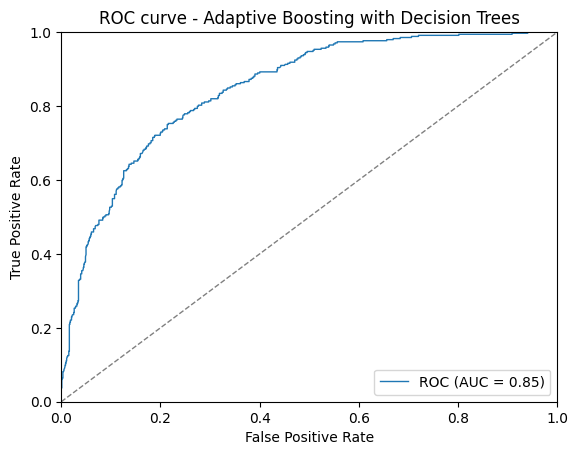

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Split the data into train and validation sets
X = train.drop('Churn', axis=1)
y = train['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

# Resample the training set using SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=12)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the hyperparameter grid for random search
param_distributions = {
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)],
    'n_estimators': np.arange(50, 500, 10),
    'learning_rate': np.arange(0.01, 0.5, 0.01)
}

# Define the AdaBoost classifier model
ada_model = AdaBoostClassifier(random_state=12)

# Wrap the AdaBoost model using the RandomizedSearchCV wrapper for use in RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=ada_model, param_distributions=param_distributions,
                                   scoring='f1', n_iter=50, cv=5, random_state=12)

# Perform random search with cross-validation
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the corresponding F1 score
print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best F1 score: {random_search.best_score_}')

# Build and evaluate the best model on the validation set
best_ada_model = AdaBoostClassifier(**random_search.best_params_, random_state=12)
best_ada_model.fit(X_train_resampled, y_train_resampled)
y_pred = best_ada_model.predict(X_val)
print(classification_report(y_val, y_pred, digits=4))
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Compute and print additional evaluation metrics
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = 2 * (ppv * sensitivity) / (ppv + sensitivity)
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'PPV: {ppv:.4f}')
print(f'Accuracy: {accuracy:.4f}')

# Calculate and plot ROC curve
y_pred_proba = best_ada_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Adaptive Boosting with Decision Trees')
plt.legend(loc="lower right")
plt.show()

In [ ]:
confusion_df = pd.DataFrame(confusion_matrix(y_val, y_pred), columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

# Print the dataframe
confusion_df

,Predicted Negative,Predicted Positive
Actual Negative,707,215
Actual Positive,82,262


## Neural Networks

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.metrics import SensitivityAtSpecificity, SpecificityAtSensitivity
from sklearn.metrics import classification_report

# Split the data into train and validation sets
X = train.drop('Churn', axis=1)
y = train['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Resample the training set using SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define a function to create a neural network model
def create_model(hidden_layers=1, units=16, dropout_rate=0.1, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=units, activation=activation, input_dim=X_train_resampled.shape[1]))
    model.add(Dropout(dropout_rate))
    for i in range(hidden_layers):
        model.add(Dense(units=units, activation=activation))
        model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

# Define the hyperparameter grid for grid search
param_grid = {
    'hidden_layers': [1, 2, 3],
    'units': [16, 32, 64],
    'dropout_rate': [0.1, 0.2, 0.3],
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'rmsprop']
}

# Wrap the Keras model using the KerasClassifier wrapper for use in GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)

# Perform grid search with cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5)
grid_result = grid.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the corresponding F1 score
print(f'Best hyperparameters: {grid_result.best_params_}')
print(f'Best F1 score: {grid_result.best_score_}')

# Build and evaluate the best model on the validation set
best_model = create_model(**grid_result.best_params_)
best_model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, verbose=0)
y_pred = best_model.predict(X_val)
print(classification_report(y_val, y_pred.round(), digits=4))

# Compute and print additional evaluation metrics
tn, fp, fn, tp = confusion_matrix(y_val, y_pred.round()).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = 2 * (ppv * sensitivity) / (ppv + sensitivity)
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'PPV: {ppv:.4f}')
print(f'Accuracy: {accuracy:.4f}')

<ipython-input-95-61f3b830d002>:42: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)


47/47 [==============================] - 0s 2ms/step
Best hyperparameters: {'activation': 'relu', 'dropout_rate': 0.2, 'hidden_layers': 3, 'optimizer': 'adam', 'units': 64}
Best F1 score: 0.7288976643911488
40/40 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0     0.9068    0.7466    0.8189       951
           1     0.5010    0.7683    0.6065       315

    accuracy                         0.7520      1266
   macro avg     0.7039    0.7574    0.7127      1266
weighted avg     0.8058    0.7520    0.7661      1266

Sensitivity: 0.7683
Specificity: 0.7466
PPV: 0.5010
Accuracy: 0.7520


In [ ]:
print(tn, fp, fn, tp)

710 241 73 242


## Gradient Boosting

Best hyperparameters: {'subsample': 0.8500000000000003, 'n_estimators': 170, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 0.5, 'max_depth': 9, 'learning_rate': 0.21000000000000002}
Best F1 score: 0.8213139475600728
              precision    recall  f1-score   support

           0     0.8628    0.8048    0.8328       922
           1     0.5567    0.6570    0.6027       344

    accuracy                         0.7646      1266
   macro avg     0.7097    0.7309    0.7177      1266
weighted avg     0.7796    0.7646    0.7702      1266

Confusion Matrix:
[[742 180]
 [118 226]]
Sensitivity: 0.6570
Specificity: 0.8048
PPV: 0.5567
Accuracy: 0.7646


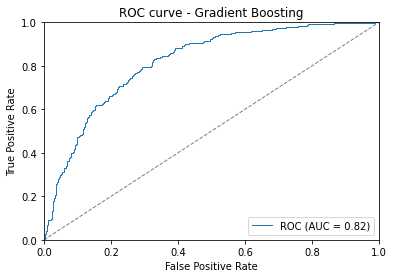

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load the data
data = train.copy()

# Split the data into train and validation sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

# Resample the training set using SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=12)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the hyperparameter grid for random search
param_distributions = {
    'learning_rate': np.arange(0.01, 0.5, 0.01),
    'n_estimators': np.arange(50, 500, 10),
    'max_depth': np.arange(2, 10),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5),
    'subsample': np.arange(0.5, 1, 0.05),
    'max_features': np.arange(0.5, 1, 0.05)
}

# Define the Gradient Boosting classifier model
gb_model = GradientBoostingClassifier(random_state=12)

# Wrap the Gradient Boosting model using the RandomizedSearchCV wrapper for use in RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_distributions,
                                   scoring='f1', n_iter=50, cv=5, random_state=12)

# Perform random search with cross-validation
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the corresponding F1 score
print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best F1 score: {random_search.best_score_}')

# Build and evaluate the best model on the validation set
best_gb_model = GradientBoostingClassifier(**random_search.best_params_, random_state=12)
best_gb_model.fit(X_train_resampled, y_train_resampled)
y_pred = best_gb_model.predict(X_val)
print(classification_report(y_val, y_pred, digits=4))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Compute and print additional evaluation metrics
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = 2 * (ppv * sensitivity) / (ppv + sensitivity)
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'PPV: {ppv:.4f}')
print(f'Accuracy: {accuracy:.4f}')

# Calculate and plot ROC curve
y_pred_proba = best_gb_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

## XGBoost

Best hyperparameters: {'subsample': 0.9500000000000004, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.13, 'gamma': 0.54, 'colsample_bytree': 0.9500000000000004}
Best F1 score: 0.8105240883543997
              precision    recall  f1-score   support

           0     0.8799    0.7863    0.8305       922
           1     0.5543    0.7122    0.6234       344

    accuracy                         0.7662      1266
   macro avg     0.7171    0.7493    0.7269      1266
weighted avg     0.7914    0.7662    0.7742      1266

Confusion Matrix:
[[725 197]
 [ 99 245]]
Sensitivity: 0.7122
Specificity: 0.7863
PPV: 0.5543
Accuracy: 0.7662


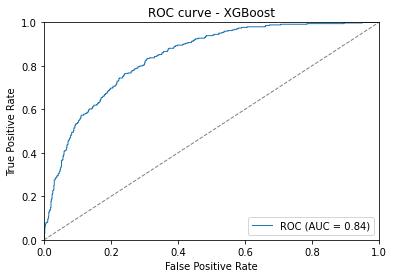

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Split the data into train and validation sets
X = train.drop('Churn', axis=1)
y = train['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

# Resample the training set using SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=12)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the hyperparameter grid for random search
param_distributions = {
    'max_depth': np.arange(2, 10),
    'n_estimators': np.arange(50, 500, 10),
    'learning_rate': np.arange(0.01, 0.5, 0.01),
    'min_child_weight': np.arange(1, 10),
    'gamma': np.arange(0, 1, 0.01),
    'subsample': np.arange(0.5, 1, 0.05),
    'colsample_bytree': np.arange(0.5, 1, 0.05)
}

# Define the XGBoost classifier model
xgb_model = xgb.XGBClassifier(random_state=12)

# Wrap the XGBoost model using the RandomizedSearchCV wrapper for use in RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_distributions,
                                   scoring='f1', n_iter=50, cv=5, random_state=12)

# Perform random search with cross-validation
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the corresponding F1 score
print(f'Best hyperparameters: {random_search.best_params_}')
print(f'Best F1 score: {random_search.best_score_}')

# Build and evaluate the best model on the validation set
best_xgb_model = xgb.XGBClassifier(**random_search.best_params_, random_state=12)
best_xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred = best_xgb_model.predict(X_val)
print(classification_report(y_val, y_pred, digits=4))
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Compute and print additional evaluation metrics
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = 2 * (ppv * sensitivity) / (ppv + sensitivity)
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'PPV: {ppv:.4f}')
print(f'Accuracy: {accuracy:.4f}')

# Calculate and plot ROC curve
y_pred_proba = best_xgb_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color='gray', lw=1)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

# Performance Evaluation

## Running Best Model on Final Test

In [ ]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 6217 to 4333
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SeniorCitizen                   704 non-null    int64  
 1   Partner                         704 non-null    int64  
 2   Dependents                      704 non-null    int64  
 3   OnlineSecurity                  704 non-null    int64  
 4   TechSupport                     704 non-null    int64  
 5   PaperlessBilling                704 non-null    int64  
 6   Churn                           704 non-null    int64  
 7   PC1                             704 non-null    float64
 8   PC2                             704 non-null    float64
 9   PaymentMethod_Electronic check  704 non-null    uint8  
 10  Contract_Month-to-month         704 non-null    uint8  
 11  InternetService_DSL             704 non-null    uint8  
 12  InternetService_Fiber optic     

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, precision_score, recall_score

# Extract the input features and target variable
X_test = final_test.drop('Churn', axis=1)
y_test = final_test['Churn']

# Make predictions using the trained model
y_pred = best_lr_model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Create a pandas dataframe to display the evaluation metrics
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression on Test Data'],
    'Accuracy': [accuracy],
    'F1 Score': [f1],
    'Sensitivity': [sensitivity],
    'Specificity': [specificity],
    'Precision': [precision],
    'AUC': [auc]
})

# Display the dataframe
metrics_df

,Model,Accuracy,F1 Score,Sensitivity,Specificity,Precision,AUC
0,Logistic Regression on Test Data,0.714489,0.563991,0.722222,0.711832,0.462633,0.717027


In [ ]:
# Create a pandas dataframe to display the confusion matrix
conf_matrix_df = pd.DataFrame({
    '': ['Actual Negative', 'Actual Positive'],
    'Predicted Negative': [tn, fn],
    'Predicted Positive': [fp, tp]
})

conf_matrix_df

,,Predicted Negative,Predicted Positive
0,Actual Negative,373,151
1,Actual Positive,50,130


## Feature Importance

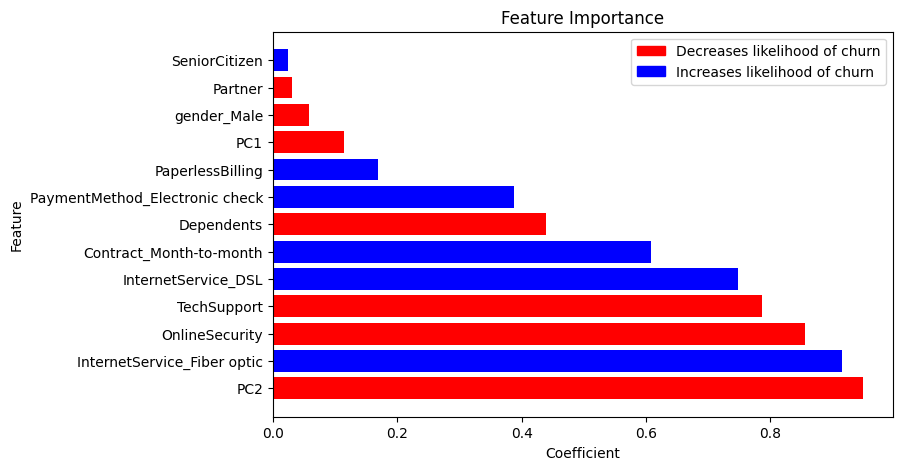

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the coefficients of the input features
feature_importance = best_lr_model.coef_[0]

# Create a pandas dataframe to store the feature importances
fi_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importance
})

# Sort the dataframe by the absolute value of feature importance
fi_df = fi_df.iloc[abs(fi_df['Importance']).argsort()[::-1]]

# Create a numpy array to store the colors for the bar graph
colors = np.where(fi_df['Importance'] > 0, 'b', 'r')

# Plot the feature importances as a horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 5))
plt.barh(fi_df['Feature'], abs(fi_df['Importance']), color=colors)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Create a legend for the color coding
legend_labels = ['Decreases likelihood of churn', 'Increases likelihood of churn']
legend_colors = ['r', 'b']
handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
plt.legend(handles, legend_labels)

plt.show()

## Gains chart and Decile Lift Chart

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 6217 to 4333
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SeniorCitizen                   704 non-null    int64  
 1   Partner                         704 non-null    int64  
 2   Dependents                      704 non-null    int64  
 3   OnlineSecurity                  704 non-null    int64  
 4   TechSupport                     704 non-null    int64  
 5   PaperlessBilling                704 non-null    int64  
 6   Churn                           704 non-null    int64  
 7   PC1                             704 non-null    float64
 8   PC2                             704 non-null    float64
 9   PaymentMethod_Electronic check  704 non-null    uint8  
 10  Contract_Month-to-month         704 non-null    uint8  
 11  InternetService_DSL             704 non-null    uint8  
 12  InternetService_Fiber optic     

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6328 entries, 5468 to 5963
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SeniorCitizen                   6328 non-null   int64  
 1   Partner                         6328 non-null   int64  
 2   Dependents                      6328 non-null   int64  
 3   OnlineSecurity                  6328 non-null   int64  
 4   TechSupport                     6328 non-null   int64  
 5   PaperlessBilling                6328 non-null   int64  
 6   Churn                           6328 non-null   int64  
 7   PC1                             6328 non-null   float64
 8   PC2                             6328 non-null   float64
 9   PaymentMethod_Electronic check  6328 non-null   uint8  
 10  Contract_Month-to-month         6328 non-null   uint8  
 11  InternetService_DSL             6328 non-null   uint8  
 12  InternetService_Fiber optic    

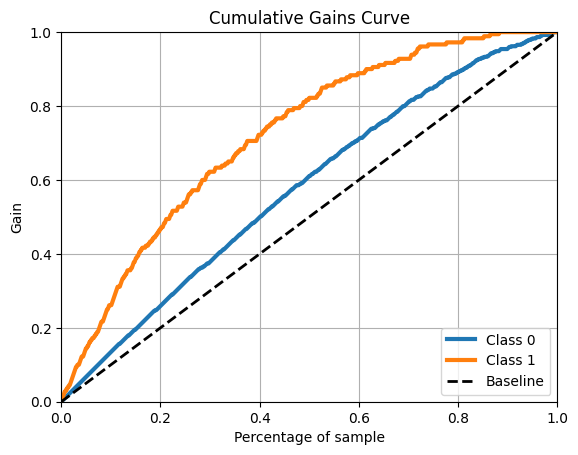

In [ ]:
import scikitplot as skplt

# Use the predict_proba method to predict class probabilities for test data
y_probas = best_lr_model.predict_proba(final_test.drop('Churn', axis=1))

# Plot the gain chart
skplt.metrics.plot_cumulative_gain(final_test['Churn'], y_probas)
plt.show()

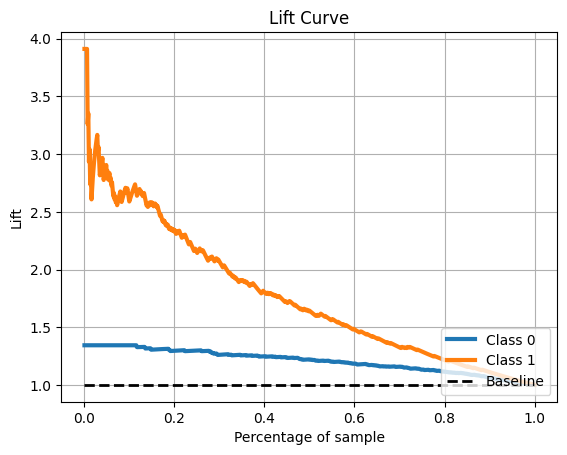

In [ ]:
# Plot the decile lift chart
skplt.metrics.plot_lift_curve(final_test['Churn'], y_probas)
plt.show()

In [ ]:
# Creating table for decile lift chart
propensities = best_lr_model.predict_proba(final_test.drop('Churn', axis=1))[:, 1]
propensities

array([0.05132572, 0.10445566, 0.7798461 , 0.3699064 , 0.59549942,
       0.10037515, 0.30620662, 0.03237604, 0.70523237, 0.33333155,
       0.63117296, 0.21997643, 0.02581467, 0.39276074, 0.30849177,
       0.39444689, 0.03302788, 0.22769098, 0.29714894, 0.40707721,
       0.24619435, 0.13709652, 0.5885376 , 0.58900632, 0.80823138,
       0.04049482, 0.7136999 , 0.06316115, 0.19080267, 0.19810657,
       0.34457811, 0.12586364, 0.82086098, 0.1121728 , 0.82768685,
       0.26147194, 0.8795126 , 0.0942146 , 0.04151279, 0.09302277,
       0.30896954, 0.79652173, 0.19318729, 0.0405576 , 0.2548253 ,
       0.58655166, 0.26755898, 0.35158086, 0.82115157, 0.37557957,
       0.88870583, 0.17463492, 0.41761814, 0.62764254, 0.02710048,
       0.52957514, 0.6744307 , 0.21858556, 0.06045033, 0.91561005,
       0.38457037, 0.78953246, 0.74539841, 0.3787974 , 0.06361264,
       0.75104077, 0.0625943 , 0.62554549, 0.65924508, 0.63189514,
       0.41175058, 0.0737841 , 0.36984633, 0.31856581, 0.90436

In [ ]:
# Adding model propensity as a column
test_data = final_test.copy()
test_data['Propensity'] = propensities
test_data.head()

,SeniorCitizen,Partner,Dependents,OnlineSecurity,TechSupport,PaperlessBilling,Churn,PC1,PC2,PaymentMethod_Electronic check,Contract_Month-to-month,InternetService_DSL,InternetService_Fiber optic,gender_Male,Propensity
6217,0,0,0,0,0,0,0,-0.061987,1.817243,0,0,0,0,1,0.051326
3564,0,1,1,0,0,0,0,-1.679461,0.706998,0,0,0,0,1,0.104456
6787,0,0,0,0,0,1,0,-0.772247,-0.658870,0,1,0,1,0,0.779846
6480,0,0,0,0,0,1,1,-2.132483,0.372184,0,1,0,0,1,0.369906
2814,0,0,0,1,0,0,0,-1.417054,-0.505610,1,1,1,0,0,0.595499


In [ ]:
# Sorting in descending order of propensity
test_data = test_data.sort_values(by='Propensity', ascending=False).reset_index(drop=True)
test_data.head()

,SeniorCitizen,Partner,Dependents,OnlineSecurity,TechSupport,PaperlessBilling,Churn,PC1,PC2,PaymentMethod_Electronic check,Contract_Month-to-month,InternetService_DSL,InternetService_Fiber optic,gender_Male,Propensity
0,0,0,0,0,0,1,1,-0.774641,-1.801184,1,1,0,1,1,0.935758
1,1,0,0,0,0,1,1,-0.974372,-1.481494,1,1,0,1,0,0.922722
2,1,0,0,0,0,1,1,-0.365317,-1.556319,1,1,0,1,1,0.918616
3,1,0,0,0,0,1,1,-0.831273,-1.397752,1,1,0,1,0,0.915610
4,1,0,0,0,0,1,1,-0.829221,-1.387827,1,1,0,1,0,0.914861


In [ ]:
# Adding case column
test_data['Case'] = test_data.index + 1

# Calculating deciles
test_data['Decile'] = pd.qcut(test_data['Case'], 10, labels=False)

test_data.head()

,SeniorCitizen,Partner,Dependents,OnlineSecurity,TechSupport,PaperlessBilling,Churn,PC1,PC2,PaymentMethod_Electronic check,Contract_Month-to-month,InternetService_DSL,InternetService_Fiber optic,gender_Male,Propensity,Case,Decile
0,0,0,0,0,0,1,1,-0.774641,-1.801184,1,1,0,1,1,0.935758,1,0
1,1,0,0,0,0,1,1,-0.974372,-1.481494,1,1,0,1,0,0.922722,2,0
2,1,0,0,0,0,1,1,-0.365317,-1.556319,1,1,0,1,1,0.918616,3,0
3,1,0,0,0,0,1,1,-0.831273,-1.397752,1,1,0,1,0,0.915610,4,0
4,1,0,0,0,0,1,1,-0.829221,-1.387827,1,1,0,1,0,0.914861,5,0


In [ ]:
test_data["Decile"] = test_data["Decile"]+1

In [ ]:
# Reordering columns

# Get list of columns to include in new order
cols = ['Case'] + [col for col in test_data.columns if col not in ['Churn', 'Propensity', 'Decile']] + ['Propensity', 'Churn', 'Decile']

test_data = test_data.reindex(cols, axis=1)
test_data.head()

,Case,SeniorCitizen,Partner,Dependents,OnlineSecurity,TechSupport,PaperlessBilling,PC1,PC2,PaymentMethod_Electronic check,Contract_Month-to-month,InternetService_DSL,InternetService_Fiber optic,gender_Male,Case,Propensity,Churn,Decile
0,1,0,0,0,0,0,1,-0.774641,-1.801184,1,1,0,1,1,1,0.935758,1,1
1,2,1,0,0,0,0,1,-0.974372,-1.481494,1,1,0,1,0,2,0.922722,1,1
2,3,1,0,0,0,0,1,-0.365317,-1.556319,1,1,0,1,1,3,0.918616,1,1
3,4,1,0,0,0,0,1,-0.831273,-1.397752,1,1,0,1,0,4,0.915610,1,1
4,5,1,0,0,0,0,1,-0.829221,-1.387827,1,1,0,1,0,5,0.914861,1,1


In [ ]:
test_data.to_csv('test_data.csv', index=False)
# The decile wise lift chart has been plotted on Excel